<div style="border:solid green 2px; padding: 20px">
<b>Hello Itay!</b>

My name is Evgeniy Daschenko I'm going to review your project!

My main goal is not to show that any mistakes have been made somewhere, but to share my experience that will help you in your further work. Further in the file you can see my comments, try to take them into account when performing the next tasks.


You can find my comments in <font color='green'>green</font>, <font color='blue'>blue</font> or <font color='orange'>orange</font> boxes like this:

<div class="alert alert-success">
<b>Success:</b> if everything is done succesfully
</div>

<div class="alert alert-warning">
<b>Remarks: </b> if I can give some recommendations
</div>

<div class="alert alert-danger">
<b>Needs fixing:</b> if the block requires some corrections. Work can't be accepted with the red comments.
</div>


If you have 3 orange comments, we will need to adjust the project.
    
Let's work on the project in dialogue: if you change something in the project or respond to my comments, write about it. It will be easier for me to track the changes if you highlight your comments:
    
<div class="alert alert-info"> <b>Student comment:</b> For example like this.</div>

#  Introduction to project

You work for the online store Ice, which sells video games all over the world
    
**Goal to determine whether a game succeeds or not so the company can plan ahead advertising campgains**

------------------------------------

**Data description**

The data I will be working with is from 2016.

The dataset contains the abbreviation ESRB.

The Entertainment Software Rating Board evaluates a game's content and assigns an age rating such as Teen or Mature.

* Name - name of game
* Platform - pc, playstation, nintendo
* Year_of_Release
* Genre - RPG, RTS, Shooter
* NA_sales (North American sales in USD million)
* EU_sales (sales in Europe in USD million)
* JP_sales (sales in Japan in USD million)
* Other_sales (sales in other countries in USD million)
* Critic_Score (maximum of 100)
* User_Score (maximum of 10)
* Rating (ESRB)
Data for 2016 may be incomplete.
 
 Research plan:
<a class="anchor" id="table_of_contents"></a>

[table_of_contents](#table_of_contents)

1. [look at general information of the data](#general_information)
    * Load data
    * Explore data
2. [preprocess](#preprocess)
    * Replace the column names (make them lowercase).
    * Convert the data to the required types.
    * Describe the columns where the data types have been changed and why.
    * If necessary, decide how to deal with missing values:
        ◦ Explain why you filled in the missing values as you did or why you decided to leave them blank.
        ◦ Why do you think the values are missing? Give possible reasons.
        ◦ Pay attention to the abbreviation TBD (to be determined). Specify how you intend to handle such cases.
    * Calculate the total sales (the sum of sales in all regions) for each game and put these values in a separate column.
3. [Analyze the data:](#Analyz_the_data)
* Look at how many games were released in different years. Is the data for every period significant?
* Look at how sales varied from platform to platform. Choose the platforms with the greatest total sales and build a distribution based on data for each year. Find platforms that used to be popular but now have zero sales. How long does it generally take for new platforms to appear and old ones to fade?
* Determine what period you should take data for. To do so, look at your answers to the previous questions. The data should allow you to build a prognosis for 2017.
* Work only with the data that you've decided is relevant. Disregard the data for previous years.
* Which platforms are leading in sales? Which ones are growing or shrinking? Select several potentially profitable platforms.
* Build a box plot for the global sales of all games, broken down by platform. Are the differences in sales significant? What about average sales on various platforms? Describe your findings.
* Take a look at how user and professional reviews affect sales for one popular platform (you choose). Build a scatter plot and calculate the correlation between reviews and sales. Draw conclusions.
* Keeping your conclusions in mind, compare the sales of the same games on other platforms.
* Take a look at the general distribution of games by genre. What can we say about the most profitable genres? Can you generalize about genres with high and low sales?
* graph analysis

4. [Create a user profile for each region](#Create_a_user_profile_for_each_region)

5. [Test the following hypotheses](#Test_the_following_hypotheses)
* Explain:
    * How you formulated the null and alternative hypotheses.
    * What criterion you used to test the hypotheses and why.
    
6. [General Conclusion](#General_Conclusion)


**Did you leave clear, relevant comments at each step?**

<div class="alert alert-success"> <b>Reviewer comment:</b> 
    
Getting started is very important. So you explain what it is dedicated to. 
    
</div>

<a class='anchor' id='general_information'></a>
[Go back to the Table of Contents](#table_of_contents)
## [General information](#general_information)

In [1]:
# pip install sidetable

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 10.8 MB 1.6 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [1]:
# pip install squarify

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [1]:
# Load relevant libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import sidetable
import squarify
import warnings
warnings.simplefilter ('ignore')

from matplotlib.axes._axes import _log as matplotlib_axes_logger
matplotlib_axes_logger.setLevel('ERROR')

/opt/conda/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
# Load data
try:
    game_sales_df = pd.read_csv('./games.csv')
except:
    game_sales_df = pd.read_csv('/datasets/games.csv')

# checking if data is loaded correctly
game_sales_df.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [3]:
game_sales_df.sample(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
9584,Advent Rising,XB,2005.0,Action,0.10,0.03,0.00,0.00,68.0,7.5,T
13385,FIFA Soccer 10,PC,2009.0,Sports,0.00,0.04,0.00,0.01,72.0,3.8,E
15274,Motto! SoniComi,PS3,2014.0,Simulation,0.00,0.00,0.02,0.00,NaN,NaN,NaN
1759,Gauntlet: Dark Legacy,PS2,2001.0,Action,0.56,0.44,0.00,0.15,73.0,8.3,T
10294,ATV Quad Kings,DS,2010.0,Racing,0.10,0.00,0.00,0.01,47.0,tbd,E
3162,Dragon Ball: Raging Blast 2,X360,2010.0,Fighting,0.49,0.09,0.01,0.05,57.0,7.4,T
4388,Virtua Tennis 4,PS3,2011.0,Sports,0.09,0.24,0.03,0.08,69.0,6.6,E
4397,Sid Meier's Civilization Revolution,DS,2008.0,Strategy,0.37,0.03,0.02,0.03,80.0,7.7,E10+
9030,Mega Man Powered Up,PSP,2006.0,Platform,0.12,0.01,0.00,0.02,82.0,7.5,E
15280,Knight's Apprentice: Memorick's Adventures,XB,2004.0,Action,0.02,0.00,0.00,0.00,53.0,4.5,T


**Problems:**

seems to be some na values

General Information about the data

In [4]:
game_sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Problems:

Column names are capitalized

Type Problems:
* Year_of_Release **should be int**
* User_Score **should be int**

There are a lot of na values in Critic_Score, User_Score and Rating column

**Lets get a better measurement on coulmns with na**

In [5]:
game_sales_df.stb.missing(style=True)

,missing,total,percent
Critic_Score,"8,578","16,715",51.32%
Rating,"6,766","16,715",40.48%
User_Score,"6,701","16,715",40.09%
Year_of_Release,269,"16,715",1.61%
Name,2,"16,715",0.01%
Genre,2,"16,715",0.01%
Platform,0,"16,715",0.00%
NA_sales,0,"16,715",0.00%
EU_sales,0,"16,715",0.00%
JP_sales,0,"16,715",0.00%


<div class="alert alert-success"> <b>Reviewer comment:</b> 
    
Great way, for calculate missing values 👍
    
Below I left an example of how to calculate it yet.
    
</div>

In [6]:
game_sales_df.isna().mean().reset_index()

,index,0
0,Name,0.000120
1,Platform,0.000000
2,Year_of_Release,0.016093
3,Genre,0.000120
4,NA_sales,0.000000
5,EU_sales,0.000000
6,JP_sales,0.000000
7,Other_sales,0.000000
8,Critic_Score,0.513192
9,User_Score,0.400897


Columns with missing values:
* Critic_Score
* Rating
* User_Score
* Year_of_Release
* Name
* Genre

Na values are mostly in relation with game score
Will expolre them further more and the possible reasons, one possible reason old games

Na values in year of release maybe because the game hasn't been released yet

**fill na in year with zero**

Next we will see some basic statistics:

In [7]:
display(game_sales_df.describe(), game_sales_df.describe(include='object'))

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


,Name,Platform,Genre,User_Score,Rating
count,16713,16715,16713,10014,9949
unique,11559,31,12,96,8
top,Need for Speed: Most Wanted,PS2,Action,tbd,E
freq,12,2161,3369,2424,3990


We can see North America game sales bring in the most money in all statistical aspect (mean, median, max)

I will further explore this point

Lets check value counts in each column

In [8]:
for col in game_sales_df.columns:
    display(col, game_sales_df.stb.freq([col]))

'Name'

,Name,count,percent,cumulative_count,cumulative_percent
0,Need for Speed: Most Wanted,12,0.071800,12,0.071800
1,Ratatouille,9,0.053850,21,0.125651
2,Madden NFL 07,9,0.053850,30,0.179501
3,LEGO Marvel Super Heroes,9,0.053850,39,0.233351
4,FIFA 14,9,0.053850,48,0.287202
...,...,...,...,...,...
11554,'98 Koshien,1,0.005983,16709,99.976067
11555,Tales of Xillia 2,1,0.005983,16710,99.982050
11556,Haikyu!! Cross Team Match!,1,0.005983,16711,99.988033
11557,Fire Emblem Fates,1,0.005983,16712,99.994017


'Platform'

,Platform,count,percent,cumulative_count,cumulative_percent
0,PS2,2161,12.928507,2161,12.928507
1,DS,2151,12.868681,4312,25.797188
2,PS3,1331,7.962908,5643,33.760096
3,Wii,1320,7.897098,6963,41.657194
4,X360,1262,7.550105,8225,49.207299
5,PSP,1209,7.233024,9434,56.440323
6,PS,1197,7.161232,10631,63.601555
7,PC,974,5.827101,11605,69.428657
8,XB,824,4.929704,12429,74.358361
9,GBA,822,4.917739,13251,79.276099


'Year_of_Release'

,Year_of_Release,count,percent,cumulative_count,cumulative_percent
0,2008.0,1427,8.676882,1427,8.676882
1,2009.0,1426,8.670801,2853,17.347683
2,2010.0,1255,7.631035,4108,24.978718
3,2007.0,1197,7.278366,5305,32.257084
4,2011.0,1136,6.907455,6441,39.164538
5,2006.0,1006,6.116989,7447,45.281527
6,2005.0,939,5.709595,8386,50.991122
7,2002.0,829,5.040739,9215,56.031862
8,2003.0,775,4.712392,9990,60.744254
9,2004.0,762,4.633345,10752,65.377599


'Genre'

,Genre,count,percent,cumulative_count,cumulative_percent
0,Action,3369,20.157961,3369,20.157961
1,Sports,2348,14.048944,5717,34.206905
2,Misc,1750,10.470891,7467,44.677796
3,Role-Playing,1498,8.963083,8965,53.640878
4,Shooter,1323,7.915994,10288,61.556872
5,Adventure,1303,7.796326,11591,69.353198
6,Racing,1249,7.473224,12840,76.826423
7,Platform,888,5.313229,13728,82.139652
8,Simulation,873,5.223479,14601,87.363130
9,Fighting,849,5.079878,15450,92.443008


'NA_sales'

,NA_sales,count,percent,cumulative_count,cumulative_percent
0,0.00,4508,26.969788,4508,26.969788
1,0.02,576,3.446007,5084,30.415794
2,0.03,561,3.356267,5645,33.772061
3,0.04,549,3.284475,6194,37.056536
4,0.01,545,3.260544,6739,40.317080
...,...,...,...,...,...
397,1.97,1,0.005983,16711,99.976069
398,1.86,1,0.005983,16712,99.982052
399,1.39,1,0.005983,16713,99.988035
400,1.34,1,0.005983,16714,99.994017


'EU_sales'

,EU_sales,count,percent,cumulative_count,cumulative_percent
0,0.00,5870,35.118157,5870,35.118157
1,0.01,1494,8.938080,7364,44.056237
2,0.02,1308,7.825307,8672,51.881544
3,0.03,926,5.539934,9598,57.421478
4,0.04,709,4.241699,10307,61.663177
...,...,...,...,...,...
302,1.48,1,0.005983,16711,99.976069
303,1.46,1,0.005983,16712,99.982052
304,1.45,1,0.005983,16713,99.988035
305,1.44,1,0.005983,16714,99.994017


'JP_sales'

,JP_sales,count,percent,cumulative_count,cumulative_percent
0,0.00,10514,62.901585,10514,62.901585
1,0.02,741,4.433144,11255,67.334729
2,0.01,706,4.223751,11961,71.558480
3,0.03,546,3.266527,12507,74.825007
4,0.04,397,2.375112,12904,77.200120
...,...,...,...,...,...
239,1.16,1,0.005983,16711,99.976069
240,1.14,1,0.005983,16712,99.982052
241,1.02,1,0.005983,16713,99.988035
242,0.97,1,0.005983,16714,99.994017


'Other_sales'

,Other_sales,count,percent,cumulative_count,cumulative_percent
0,0.00,6601,39.491475,6601,39.491475
1,0.01,3464,20.723901,10065,60.215375
2,0.02,1618,9.679928,11683,69.895304
3,0.03,926,5.539934,12609,75.435238
4,0.04,654,3.912653,13263,79.347891
...,...,...,...,...,...
150,0.93,1,0.005983,16711,99.976069
151,0.92,1,0.005983,16712,99.982052
152,0.89,1,0.005983,16713,99.988035
153,0.84,1,0.005983,16714,99.994017


'Critic_Score'

,Critic_Score,count,percent,cumulative_count,cumulative_percent
0,70.0,256,3.146123,256,3.146123
1,71.0,254,3.121544,510,6.267666
2,75.0,245,3.010938,755,9.278604
3,78.0,240,2.949490,995,12.228094
4,73.0,238,2.924911,1233,15.153005
...,...,...,...,...,...
77,20.0,3,0.036869,8133,99.950842
78,22.0,1,0.012290,8134,99.963131
79,21.0,1,0.012290,8135,99.975421
80,17.0,1,0.012290,8136,99.987710


'User_Score'

,User_Score,count,percent,cumulative_count,cumulative_percent
0,tbd,2424,24.206111,2424,24.206111
1,7.8,324,3.235470,2748,27.441582
2,8,290,2.895946,3038,30.337527
3,8.2,282,2.816058,3320,33.153585
4,8.3,254,2.536449,3574,35.690034
...,...,...,...,...,...
91,0.5,2,0.019972,10008,99.940084
92,0.3,2,0.019972,10010,99.960056
93,0.2,2,0.019972,10012,99.980028
94,9.7,1,0.009986,10013,99.990014


'Rating'

,Rating,count,percent,cumulative_count,cumulative_percent
0,E,3990,40.104533,3990,40.104533
1,T,2961,29.761785,6951,69.866318
2,M,1563,15.710122,8514,85.576440
3,E10+,1420,14.272791,9934,99.849231
4,EC,8,0.080410,9942,99.929641
5,RP,3,0.030154,9945,99.959795
6,K-A,3,0.030154,9948,99.989949
7,AO,1,0.010051,9949,100.000000


Some interesting observations from values:
* Platform: ps2
* genre: action 
* name: Need for Speed: Most Wanted
* user score: tbd

perhaps the ps2 platform is the most popular because it realeses more action games 

User_Score column is string because of the value 'tbd'

Lets check the largest values in each column


In [9]:
numeric_col = game_sales_df.describe().columns.values

for i in range(0,len(numeric_col)):
    display(numeric_col[i], game_sales_df.nlargest(5,[numeric_col[i]]))

'Year_of_Release'

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
94,FIFA 17,PS4,2016.0,Sports,0.66,5.75,0.08,1.11,85.0,5,E
108,Pokemon Sun/Moon,3DS,2016.0,Role-Playing,2.98,1.45,2.26,0.45,NaN,NaN,NaN
171,Uncharted 4: A Thief's End,PS4,2016.0,Shooter,1.85,2.50,0.19,0.85,93.0,7.9,T
245,Call of Duty: Infinite Warfare,PS4,2016.0,Shooter,1.61,2.00,0.15,0.71,77.0,3.4,M
289,Battlefield 1,PS4,2016.0,Shooter,1.10,2.15,0.21,0.61,88.0,8.4,M


'NA_sales'

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E


'EU_sales'

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
19,Brain Age: Train Your Brain in Minutes a Day,DS,2005.0,Misc,4.74,9.20,4.16,2.04,77.0,7.9,E


'JP_sales'

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
12,Pokemon Gold/Pokemon Silver,GB,1999.0,Role-Playing,9.00,6.18,7.20,0.71,NaN,NaN,NaN
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
20,Pokemon Diamond/Pokemon Pearl,DS,2006.0,Role-Playing,6.38,4.46,6.04,1.36,NaN,NaN,NaN


'Other_sales'

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
17,Grand Theft Auto: San Andreas,PS2,2004.0,Action,9.43,0.40,0.41,10.57,95.0,9,M
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
48,Gran Turismo 4,PS2,2004.0,Racing,3.01,0.01,1.10,7.53,89.0,8.5,E
16,Grand Theft Auto V,PS3,2013.0,Action,7.02,9.09,0.98,3.96,97.0,8.2,M
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E


'Critic_Score'

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
51,Grand Theft Auto IV,X360,2008.0,Action,6.76,3.07,0.14,1.03,98.0,7.9,M
57,Grand Theft Auto IV,PS3,2008.0,Action,4.76,3.69,0.44,1.61,98.0,7.5,M
227,Tony Hawk's Pro Skater 2,PS,2000.0,Sports,3.05,1.41,0.02,0.20,98.0,7.7,T
5350,SoulCalibur,DC,1999.0,Fighting,0.00,0.00,0.34,0.00,98.0,8.8,T
16,Grand Theft Auto V,PS3,2013.0,Action,7.02,9.09,0.98,3.96,97.0,8.2,M


Some observations:
* Na_Sales and Eu_Sales have similar games in the top values, Jp_Sales have different games
* Rating E is dominate in all regions except 'other_region' column
* Critic_Score games are in the top sales **only** in 'Other_Regions'

Question to explore:
* Is 'User_Score' more correlated to 'Na_Sales', 'Eu_sale' or 'Jp_Sales'

**General information Conclusion**

Several problems were identified:
* columns names are capitalized
* missing values in
    * Critic_Score
    * Rating
    * User_Score
    * Year_of_Release
    * Name
    * Genre
* types of columns
    * Year_of_Release **should be int**
    * User_Score **should be int**

We also started seeing information regarding region revenue.

in preliminary investigation North America is the most profitable.

**Next** we will start cleaning and fixing the data.


<a class='anchor' id='preprocess'></a>
[Go back to the Table of Contents](#table_of_contents)
## [preprocess](#preprocess)

**How do you prepare a dataset for analysis?**

* [x] Replace the column names (make them lowercase).
* [x] Convert the data to the required types.
* [x] Describe the columns where the data types have been changed and why.
* [x] If necessary, decide how to deal with missing values:
    * [x] Explain why you filled in the missing values as you did or why you decided to leave them blank.
    * [x] Why do you think the values are missing? Give possible reasons.
    * [x] Pay attention to the abbreviation TBD (to be determined). Specify how you intend to handle such cases.
* Calculate the total sales (the sum of sales in all regions) for each game and put these values in a separate column.

**Todo**
* show and explain that the rows with actual data is low numbers so it won't affect the data too much so i'm willing to take that risk

<div class="alert alert-success"> <b>Reviewer comment:</b> 
    
We looked at our data in detail, let's prepare it now.
    
</div>

**First we will change columns to lower case for easier work**

In [10]:
game_sales_df.columns = game_sales_df.columns.str.lower()
def to_lower(df):
    columns = df.columns
    for col in columns:
        if df[col].dtype == 'O':
            df[col] = df[col].str.lower()
            
to_lower(game_sales_df)
game_sales_df

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,wii sports,wii,2006.0,sports,41.36,28.96,3.77,8.45,76.0,8,e
1,super mario bros.,nes,1985.0,platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,mario kart wii,wii,2008.0,racing,15.68,12.76,3.79,3.29,82.0,8.3,e
3,wii sports resort,wii,2009.0,sports,15.61,10.93,3.28,2.95,80.0,8,e
4,pokemon red/pokemon blue,gb,1996.0,role-playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,samurai warriors: sanada maru,ps3,2016.0,action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,lma manager 2007,x360,2006.0,sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,haitaka no psychedelica,psv,2016.0,adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,spirits & spells,gba,2003.0,platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


<div class="alert alert-success"> <b>Reviewer comment:</b> 
    
A great way to replace case in our data 👍
    
</div>

Next lets check missing values and figure how to handle them

 --------------------
 There are only 2 na values in 'name' so I will drop them, this will also takes care of 'genre' column.

In [11]:
game_sales_df = game_sales_df.dropna(subset=['name'])

Next lets check how many na values are there

In [12]:
columns_with_na = ['year_of_release','critic_score', 'rating']
def print_na_val(columns, df):
    for col_name in columns_with_na:
        display(col_name, df[col_name].isnull().sum())

    display('user_score na', len(df[df['user_score'].isna()]))
    display('user_score tbd', len(df[df['user_score'] == 'tbd']))

    print('total rows with na', df.isna().any(axis=1).sum())
    print('total probelmatic values in user_score:', 6701 + 2424)

print_na_val(columns_with_na, game_sales_df)

'year_of_release'

269

'critic_score'

8576

'rating'

6764

'user_score na'

6699

'user_score tbd'

2424

total rows with na 8835
total probelmatic values in user_score: 9125


I will leave most of the na values as is since handeling values of game scores is not accurate and can affect results.

I will change year_of_release to 0 so I can filter and be able to able to convert this column to integer

As for tbd, I consider them as na values so I will replace tbd to na.

In [13]:
game_sales_df.loc[game_sales_df['year_of_release'].isnull(), 'year_of_release'] = 0

game_sales_df.loc[game_sales_df['user_score'] == 'tbd', 'user_score'] = np.nan
print_na_val(columns_with_na, game_sales_df)

'year_of_release'

0

'critic_score'

8576

'rating'

6764

'user_score na'

9123

'user_score tbd'

0

total rows with na 9766
total probelmatic values in user_score: 9125


**Summary of handeling na**

How I handled na values:
* year_of_release: turn to zero so I can convert the column to int
* critic_score,user_score, rating: left as is since it's hard to give actual value and changing them can affect results
    * decided to change tbd in user_score to na since I conseder how I treat them the same
      this also alows e to handle the user_score in a numeric way

**Possible reasons for na values:**
* year_of_release: 
    * perhaps the games are old
    * there are contridictary dates for the game release
* name, genre: 
    * seems like a bad entery
* critic_score: 
    * since it seems critic score is a mean of scores maybe it's hard to collect scores as critic give score in different times.
    * not all games were reviewed.
    * perhaps the game is old.
* user_score: 
    * old games
    * this metric might have been collected only when users data base have been existed, which is not long (steam was created in 2003) further not all games were in these gaming services so user score is hard to collect.

**Lets check duplicates**

In [14]:
game_sales_df[game_sales_df.duplicated()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


No duplicates, we can continue to converting column types.

----------------
Lets see again columns types and change accordingly.

In [15]:
game_sales_df.info()

# had an issue with converting '2010.0' to int, had to convert it first to float
game_sales_df = game_sales_df.astype({
    'year_of_release':'float',
    'critic_score':'float',
    'user_score':'float'
})


game_sales_df = game_sales_df.astype({
    'year_of_release':'int64',
})
game_sales_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16713 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.5+ MB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  ob

<div class="alert alert-success"> <b>Reviewer comment:</b> 
    
Including the `fillna` and` astype` methods can be applied to multiple columns at the same time.
    
If there are more than 2 columns, then I recommend using the `for` loop.
    
Example:
    
`df.astype ({" col1 ":" float64 "," col2 ":" int64 "})`
    
</div>

```python

columns = [col1, col2, col3]

for i in columns:
    df[i] = df[i].astype(float)

```

The types for these columns was changed:
* year_of_release from **string** to **int**
* critic_score from **string** to **float** 
* user_score from **string** to **float** 

**Next** lets calculate the total sales of each game.

In [16]:
game_sales_df['total_sales'] = game_sales_df[['na_sales','eu_sales','jp_sales', 'other_sales']].sum(axis=1)

# lets give it a proper name:
game_sales_clean = game_sales_df.copy()
game_sales_clean

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,wii sports,wii,2006,sports,41.36,28.96,3.77,8.45,76.0,8.0,e,82.54
1,super mario bros.,nes,1985,platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,mario kart wii,wii,2008,racing,15.68,12.76,3.79,3.29,82.0,8.3,e,35.52
3,wii sports resort,wii,2009,sports,15.61,10.93,3.28,2.95,80.0,8.0,e,32.77
4,pokemon red/pokemon blue,gb,1996,role-playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,samurai warriors: sanada maru,ps3,2016,action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16711,lma manager 2007,x360,2006,sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN,0.01
16712,haitaka no psychedelica,psv,2016,adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16713,spirits & spells,gba,2003,platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN,0.01


<div class="alert alert-success"> <b>Reviewer comment:</b> 
    
A great way 👍 I myself constantly use it in my practice.
    
</div>

**Preprocess conclussion:**

What was done:

* cleaned na value and 'tbd'
* changed types
* calculated the sum of sales

**Lets continue our work by analyzing the data**

<a class='anchor' id='Analyz_the_data'></a>
[Go back to the Table of Contents](#table_of_contents)

## [Analyze the data:](#Analyz_the_data)

**To be able to determine what factors affect whether a game succeed or not we need we will analyze several factors.**

We have several questions that will lead our analysis:

* [x] How many games were released in each year?
* [x] Are all the years relevant for analysis?
* [x] categorize by company
* [x] Look at how sales varied from platform to platform. Choose the platforms with the greatest total sales and build   a distribution based on data for each year. Find platforms that used to be popular but now have zero sales. How long     does it generally take for new platforms to appear and old ones to fade?
* Look at how companies sales varied, and which company products are the most popular.
* [x] Build a box plot for the global sales of all games, broken down by platform. Are the differences in sales
  significant? What about average sales on various platforms? Describe your findings.
* [x] Take a look at how user and professional reviews affect sales for one popular platform (you choose). Build a scatter
* [x] Keeping your conclusions in mind, compare the sales of the same games on other platforms.
* [x] Take a look at the general distribution of games by genre. What can we say about the most profitable genres? Can
  you generalize about genres with high and low sales?


**Lets look at years game were released**

We will graph the data.

In [17]:
df_game_year_no_zero = game_sales_clean.query('year_of_release != 0')
game_gby_year = df_game_year_no_zero.groupby(['year_of_release'])['name'].count().reset_index().sort_values(by='name')
game_gby_year

,year_of_release,name
0,1980,9
4,1984,14
5,1985,14
8,1988,15
10,1990,16
7,1987,16
9,1989,17
3,1983,17
6,1986,21
2,1982,36


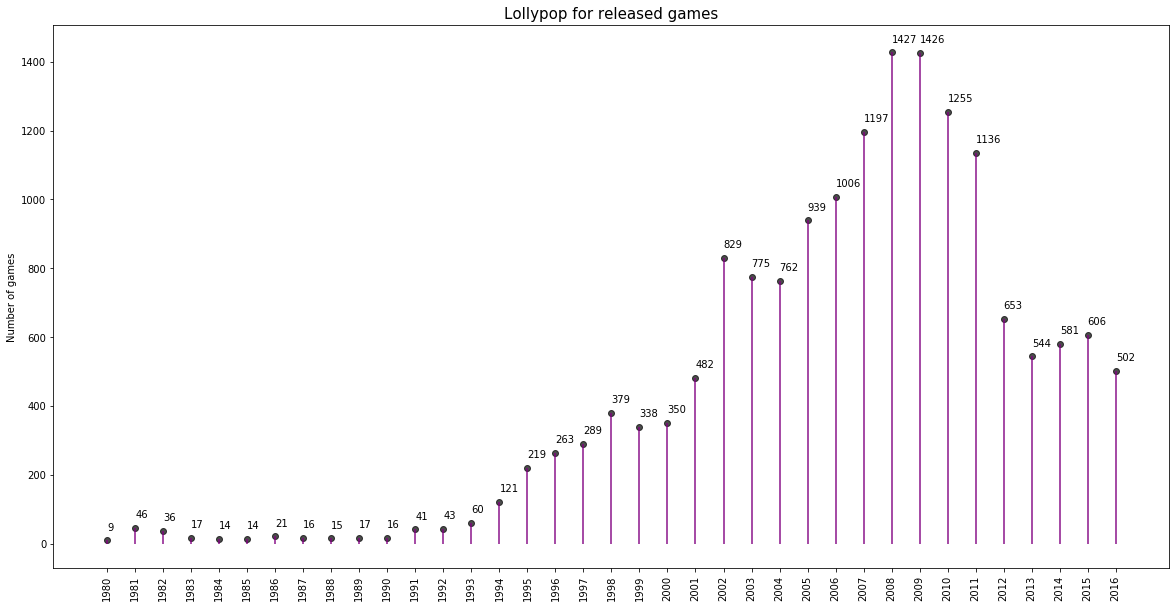

In [18]:
fig, ax = plt.subplots(figsize=(20,10))
ax.vlines(x=game_gby_year.year_of_release, ymin=0, ymax=game_gby_year.name, color='purple', alpha=0.7, linewidth=2)
ax.scatter(x=game_gby_year.year_of_release, y=game_gby_year.name, alpha=0.7, color='black')

ax.set_title('Lollypop for released games', fontdict={'size':15})
ax.set_ylabel('Number of games')
ax.set_xticks(game_gby_year.year_of_release)

ax.set_xticklabels(game_gby_year.year_of_release, rotation=(90))

for row in game_gby_year.itertuples():
    ax.text(row.year_of_release, row.name+30,s=round(row.name,2))


We seem to have very low numbers of games before 2000.<br>
Lets check what precentage of games were released before 2000.

<div class="alert alert-success"> <b>Reviewer comment:</b> 
    

It's great when the graph are labeled 😊👍
    
So it's quicker to understand what is at stake on the chart itself.
    
---
    
It is certainly a very cool practice to write values on a chart. So it's faster to figure out the specifics.
    
</div>

In [19]:
before_2000_df = game_sales_clean.query('year_of_release < 2000')
len(before_2000_df)/ len(game_sales_clean) * 100

13.420690480464309

13.4% were released before.

Also considering that some of the biggest consoles were released in 2000 (ps2),<br>
We can decide to analyze only data from 2000 and up.

In [20]:
game_sales_clean = game_sales_clean.query('year_of_release >= 2000')
game_sales_clean.year_of_release.sort_values()

11538    2000
368      2000
8766     2000
5973     2000
5963     2000
         ... 
15921    2016
10289    2016
14339    2016
14098    2016
16714    2016
Name: year_of_release, Length: 14470, dtype: int64

It would be useful to look at platform by company to help who brings the most sales.

**Lets categorize platforms.**

In [21]:
def categorize_by_company(platform):
    if platform in ['x360','xone','xb']:
        return 'microsoft'
    if platform in ['ps2','psp','ps3','ps','ps4','psv']:
        return 'sony'
    if platform in ['3ds','ds','wii','wiiu','n64','ps','gc','gba','gb']:
        return 'nintendo'
    if platform in ['pc']:
        return 'pc'
    return 'other'

game_sales_clean['company'] = game_sales_clean['platform'].apply(categorize_by_company)
game_sales_clean

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales,company
0,wii sports,wii,2006,sports,41.36,28.96,3.77,8.45,76.0,8.0,e,82.54,nintendo
2,mario kart wii,wii,2008,racing,15.68,12.76,3.79,3.29,82.0,8.3,e,35.52,nintendo
3,wii sports resort,wii,2009,sports,15.61,10.93,3.28,2.95,80.0,8.0,e,32.77,nintendo
6,new super mario bros.,ds,2006,platform,11.28,9.14,6.50,2.88,89.0,8.5,e,29.80,nintendo
7,wii play,wii,2006,misc,13.96,9.18,2.93,2.84,58.0,6.6,e,28.91,nintendo
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16710,samurai warriors: sanada maru,ps3,2016,action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01,sony
16711,lma manager 2007,x360,2006,sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN,0.01,microsoft
16712,haitaka no psychedelica,psv,2016,adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01,sony
16713,spirits & spells,gba,2003,platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN,0.01,nintendo


Lets continue exploring games by sales in each year

In [22]:
# get data by year for top 10 most sold games
game_gby_year_top_total_sales = game_sales_clean.sort_values(['year_of_release', 'total_sales'], ascending=[False, False]).groupby('year_of_release').head(10)
game_gby_year_top_total_sales.set_index(['year_of_release','name'])

platform         genre  \
year_of_release name                                                    
2016            fifa 17                             ps4        sports   
                pokemon sun/moon                    3ds  role-playing   
                uncharted 4: a thief's end          ps4       shooter   
                call of duty: infinite warfare      ps4       shooter   
                battlefield 1                       ps4       shooter   
...                                                 ...           ...   
2000            tekken tag tournament               ps2      fighting   
                spyro: year of the dragon            ps      platform   
                wwf smackdown!                       ps      fighting   
                rugrats in paris: the movie          ps        action   
                crash bash                           ps          misc   

                                                na_sales  eu_sales  jp_sales  \
year_of_release name                                                           
2016            fifa 17                             0.66      5.75      0.08   
                pokemon sun/moon                    2.98      1.45      2.26   
                uncharted 4: a thief's end          1.85      2.50      0.19   
                call of duty: infinite warfare      1.61      2.00      0.15   
                battlefield 1                       1.10      2.15      0.21   
...                                                  ...       ...       ...   
2000            tekken tag tournament               1.68      1.51      0.51   
                spyro: year of the dragon           1.93      1.58      0.00   
                wwf smackdown!                      2.01      1.35      0.06   
                rugrats in paris: the movie         1.96      1.33      0.00   
                crash bash                          1.56      1.47      0.19   

                                                other_sales  critic_score  \
year_of_release name                                                        
2016            fifa 17                                1.11          85.0   
                pokemon sun/moon                       0.45           NaN   
                uncharted 4: a thief's end             0.85          93.0   
                call of duty: infinite warfare         0.71          77.0   
                battlefield 1                          0.61          88.0   
...                                                     ...           ...   
2000            tekken tag tournament                  0.35          85.0   
                spyro: year of the dragon              0.19          91.0   
                wwf smackdown!                         0.16           NaN   
                rugrats in paris: the movie            0.23           NaN   
                crash bash                             0.17          68.0   

                                                user_score rating  \
year_of_release name                                                
2016            fifa 17                                5.0      e   
                pokemon sun/moon                       NaN    NaN   
                uncharted 4: a thief's end             7.9      t   
                call of duty: infinite warfare         3.4      m   
                battlefield 1                          8.4      m   
...                                                    ...    ...   
2000            tekken tag tournament                  8.5      t   
                spyro: year of the dragon              8.8      e   
                wwf smackdown!                         NaN    NaN   
                rugrats in paris: the movie            NaN    NaN   
                crash bash                             8.2      e   

                                                total_sales   company  
year_of_release name                                                   
2016        

In order to understand these games impact on sales and if this is a good indicator we need to check there precentage of sales from the entier year.

**Lets check these games precentage of sales from the entier year**

In [23]:
entire_year_sales = game_sales_clean.groupby(['year_of_release'])['total_sales'].sum()
top_ten_sales = game_gby_year_top_total_sales.groupby(['year_of_release'])['total_sales'].sum()

year_sales = pd.DataFrame(np.array(entire_year_sales.index),columns=['year_of_release'])

year_sales['total_sales'] =  entire_year_sales.values
year_sales['top_ten_sales'] =  top_ten_sales.values
year_sales['top_ten_total%'] = year_sales['top_ten_sales'] /  year_sales['total_sales'] * 100
display(year_sales)

,year_of_release,total_sales,top_ten_sales,top_ten_total%
0,2000,201.66,43.81,21.724685
1,2001,331.46,77.51,23.384420
2,2002,394.97,73.20,18.533053
3,2003,357.54,49.15,13.746714
4,2004,418.68,91.08,21.754084
5,2005,457.82,123.48,26.971299
6,2006,517.71,194.46,37.561569
7,2007,604.75,98.52,16.291029
8,2008,671.50,109.00,16.232316
9,2009,658.82,146.96,22.306548


<function matplotlib.pyplot.show(*args, **kw)>

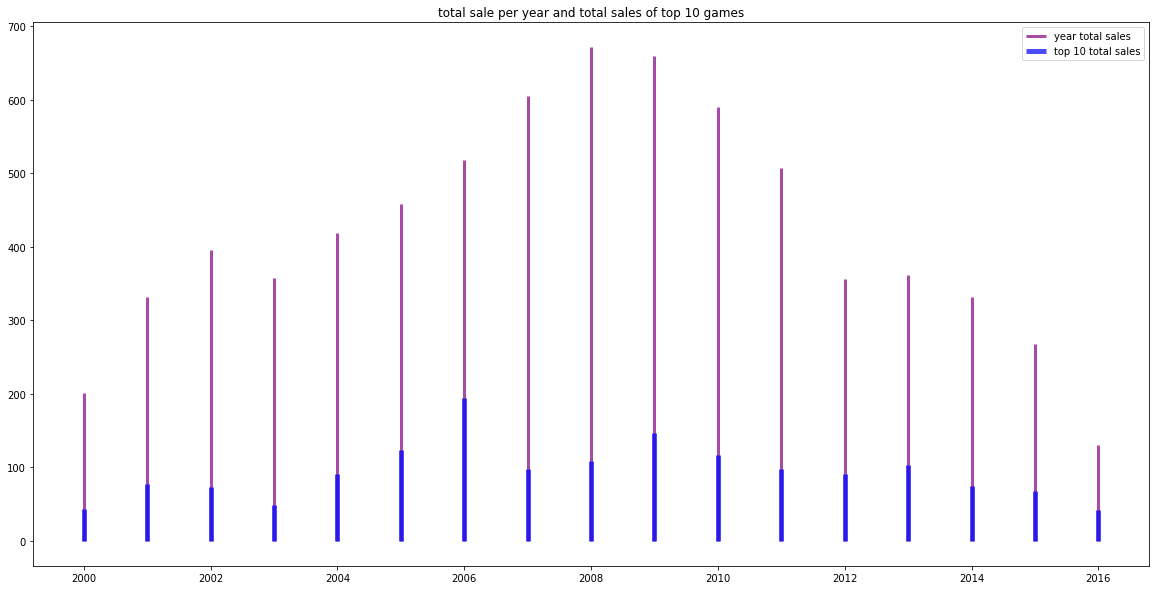

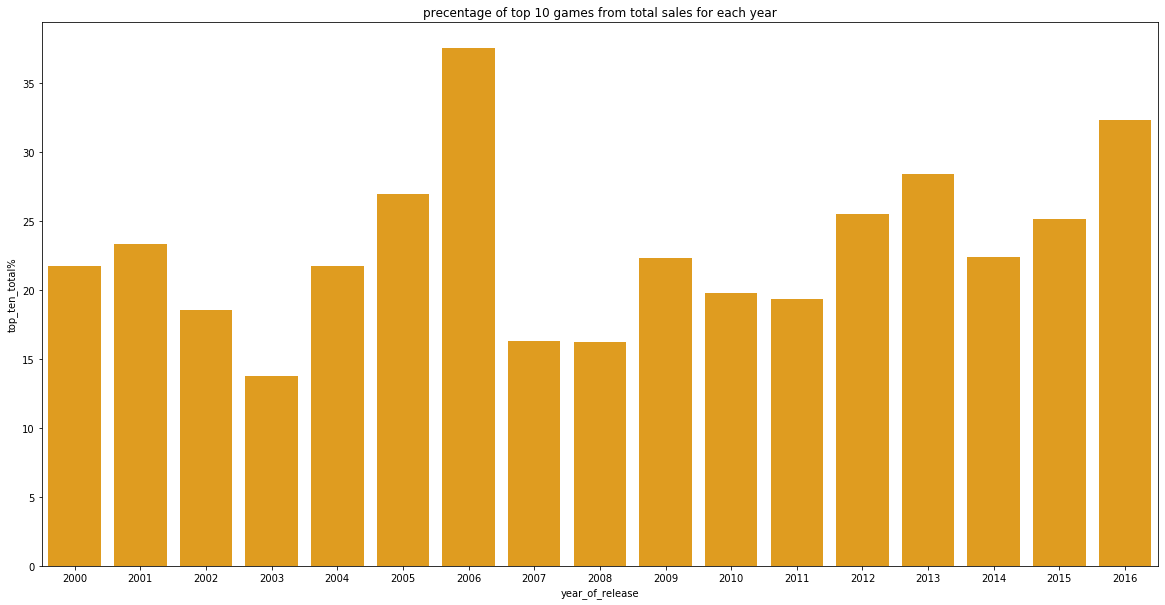

In [24]:
# calc entire year sales
fig, ax = plt.subplots(figsize=(20,10))
ax.vlines(x=year_sales.year_of_release, ymin=0, ymax=year_sales.total_sales, color='purple', alpha=0.7, linewidth=3)
ax.vlines(x=year_sales.year_of_release, ymin=0, ymax=year_sales.top_ten_sales, color='blue', alpha=0.7, linewidth=5)
ax.set_title('total sale per year and total sales of top 10 games')
ax.legend(['year total sales', 'top 10 total sales'])
plt.show

fig_two, ax_two_two = plt.subplots(figsize=(20,10))
x = sns.barplot(x = year_sales.year_of_release, y = year_sales['top_ten_total%'], color='orange')
x.set_title('precentage of top 10 games from total sales for each year')
plt.show


We can see the total sales decline <br>
We also see a small trend precentage from 2011 to 2016, very small not sure if indicative of anything.

Unfortantly this does not give us any new information.

Meaning these plot do not indicate changes in top 5 games sold is related.

Since total sales of games and number of game sold seem to go in the same trend, this might indicate a different problem.

-------------------------

**Look at how sales varied from platform to platform. Choose the platforms with the greatest total sales and build a distribution based on data for each year. Find platforms that used to be popular but now have zero sales. How long does it generally take for new platforms to appear and old ones to fade?**

In [25]:
# in order to how sales varied from platfrom to platform we need to first orgenize them
game_sorted_by_sales = game_sales_clean.sort_values(by='total_sales', ascending=False)
game_sorted_by_sales.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales,company
0,wii sports,wii,2006,sports,41.36,28.96,3.77,8.45,76.0,8.0,e,82.54,nintendo
2,mario kart wii,wii,2008,racing,15.68,12.76,3.79,3.29,82.0,8.3,e,35.52,nintendo
3,wii sports resort,wii,2009,sports,15.61,10.93,3.28,2.95,80.0,8.0,e,32.77,nintendo
6,new super mario bros.,ds,2006,platform,11.28,9.14,6.50,2.88,89.0,8.5,e,29.80,nintendo
7,wii play,wii,2006,misc,13.96,9.18,2.93,2.84,58.0,6.6,e,28.91,nintendo
8,new super mario bros. wii,wii,2009,platform,14.44,6.94,4.70,2.24,87.0,8.4,e,28.32,nintendo
10,nintendogs,ds,2005,simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN,24.67,nintendo
11,mario kart ds,ds,2005,racing,9.71,7.47,4.13,1.90,91.0,8.6,e,23.21,nintendo
13,wii fit,wii,2007,sports,8.92,8.03,3.60,2.15,80.0,7.7,e,22.70,nintendo
14,kinect adventures!,x360,2010,misc,15.00,4.89,0.24,1.69,61.0,6.3,e,21.82,microsoft


As we can see the top games with the most sales are from **Wii and DS** both are Nintendo platforms.<br>
**Question**: are they still relevant? <br>
To find out we will look for these platforms years.

In [26]:
display(game_sorted_by_sales.query('platform == "Wii"')['year_of_release'].value_counts())
display(game_sorted_by_sales.query('platform == "DS"')['year_of_release'].value_counts())

Series([], Name: year_of_release, dtype: int64)

Series([], Name: year_of_release, dtype: int64)

For 'Wii' played from 2006 and was still played even in 2016 but became irelavent in 2013 sales wise.<br>
For 'DS' played from 2006 and played until 2013 became irelavent in 2012.

**The most populare platform the life expectancy was about 7 years**<br>
 Also we observe the years were the top sold game for wii and DS were between 2006 and 2010.

It will might be a good idea to look for most sold games for each year and their platform.
Lucky we already did that work. 

Lets check the life expectancy of all the platforms

<div class="alert alert-success"> <b>Reviewer comment:</b> 
    

    
Among other things, we could calculate the lifespan of the platform - subtract from the maximum date the minimum for each platform and then average the resulting values.
    
</div>

In [27]:
# total_sales_gby_platform_year_transpo = total_sales_gby_platform_year.T
total_sales_gby_platform_year = game_gby_year_top_total_sales.groupby(
    ['year_of_release','platform'])['total_sales'].sum().reset_index('year_of_release')
total_sales_gby_platform_year.reset_index(inplace=True)

platform_life_pt = game_gby_year_top_total_sales.pivot_table(
    index=['platform'],
    values=['year_of_release','total_sales'],
    aggfunc=['describe'])

platform_life_pt.columns = platform_life_pt.columns.droplevel(0)

# renaming columns
platform_life_pt.rename(columns={'total_sales':'ts', 'year_of_release':'y'}, inplace=True)
platform_life_pt.columns = ["_".join((j,k)) for j,k in platform_life_pt.columns]
platform_life_pt.reset_index(inplace=True)
platform_life_pt.drop(columns=['ts_25%','ts_75%','y_25%','y_75%'],inplace=True)

platform_life_pt['life'] = platform_life_pt['y_max'] - platform_life_pt['y_min']


print('life expectancy: mean', platform_life_pt.life.mean(),'median',platform_life_pt.life.median(),)
platform_life_pt

life expectancy: mean 3.875 median 3.0


,platform,ts_50%,ts_count,ts_max,ts_mean,ts_min,ts_std,y_50%,y_count,y_max,y_mean,y_min,y_std,life
0,3ds,9.535,10.0,14.60,9.331000,4.59,3.234929,2013.0,10.0,2016.0,2012.900000,2011.0,1.523884,5.0
1,ds,12.140,15.0,29.80,14.507333,5.62,7.321516,2006.0,15.0,2012.0,2006.533333,2004.0,2.263583,8.0
2,gb,6.390,1.0,6.39,6.390000,6.39,NaN,2000.0,1.0,2000.0,2000.000000,2000.0,NaN,0.0
3,gba,5.490,7.0,15.84,7.771429,5.21,4.013143,2002.0,7.0,2004.0,2002.285714,2001.0,1.380131,3.0
4,gc,6.630,4.0,7.06,6.232500,4.61,1.131087,2002.0,4.0,2003.0,2002.000000,2001.0,0.816497,2.0
5,pc,6.290,3.0,8.01,6.020000,3.76,2.137826,2004.0,3.0,2009.0,2005.000000,2002.0,3.605551,7.0
6,ps,4.080,8.0,5.31,4.171250,3.39,0.712870,2000.0,8.0,2000.0,2000.000000,2000.0,0.000000,0.0
7,ps2,5.175,30.0,20.81,6.840000,3.27,4.226869,2003.0,30.0,2006.0,2002.933333,2000.0,1.552158,6.0
8,ps3,6.955,20.0,21.05,8.993500,5.27,3.903146,2011.0,20.0,2014.0,2010.750000,2007.0,2.048748,7.0
9,ps4,5.860,16.0,14.63,6.658750,2.26,3.266458,2015.0,16.0,2016.0,2015.125000,2014.0,0.806226,2.0


So the average life mean is about 3.8 years, median is 3 years.<br>
**That's quite short**

If you want to target campaign for games you have to find the relavent platform in the next 3 years

**To make life cycle more clear lets plot the top 5 platforms**

In [28]:
# Creating top platforms dataframe

top_platform_names = total_sales_gby_platform_year.groupby(
    'platform')['total_sales'].sum().sort_values(ascending=False).head(7).index

top_platform = total_sales_gby_platform_year[total_sales_gby_platform_year['platform'].isin(top_platform_names)]
rest_platforms = total_sales_gby_platform_year[~total_sales_gby_platform_year['platform'].isin(top_platform_names)]

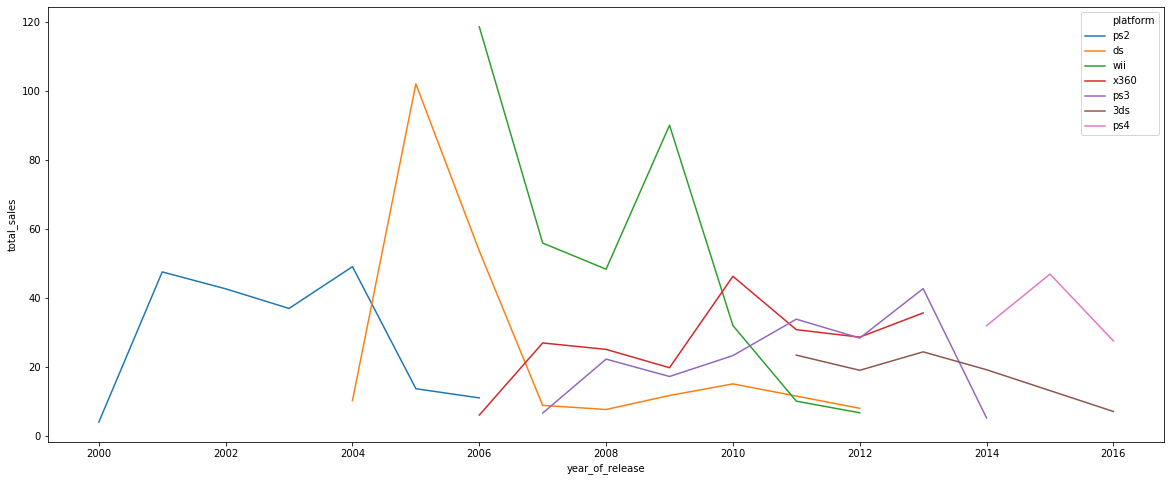

In [29]:
plt.figure(figsize=(20, 8))
sns.lineplot(data=top_platform , x='year_of_release', y='total_sales', hue='platform', estimator='sum', markers=False, ci = None)
plt.show()

We can see how platform drop in a short time.

Unfortuantly we do not see platform that start a rise.

Lets view the rest of the platforms

<div class="alert alert-warning"> <b>Reviewer comment:</b> 
    
Please note that the chart is not entirely readable because it includes many lines.
    
I would recommend looking at each platform on a separate chart, or using the `subplots` method.    
</div>

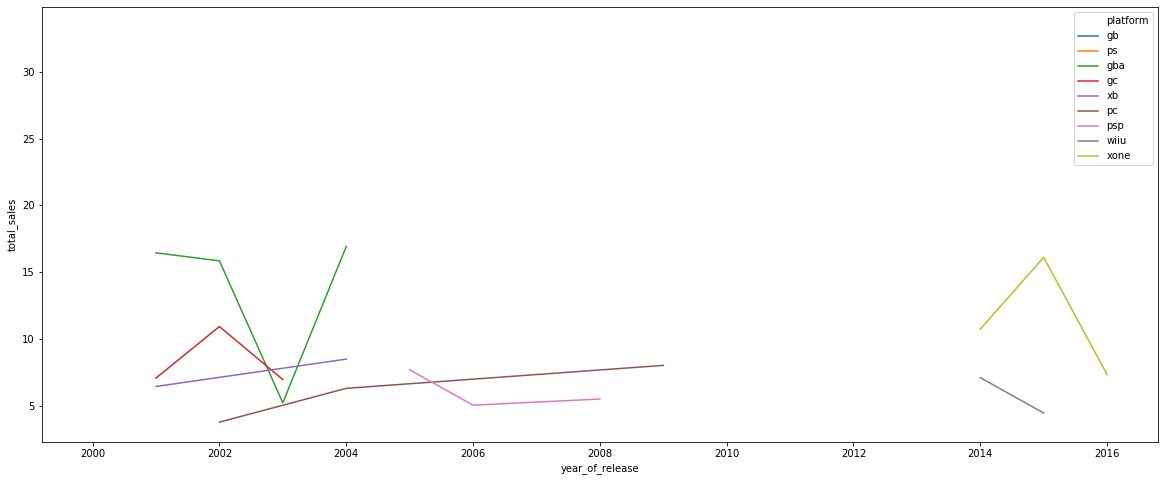

In [30]:
plt.figure(figsize=(20, 8))
sns.lineplot(data=rest_platforms , x='year_of_release', y='total_sales', hue='platform', estimator='sum', markers=False, ci = None)
plt.show()

<div class="alert alert-success"> <b>Reviewer comment:</b> 
    
Please note that our actions are repeated in terms of plotting.
    
This suggests that we can create a function that will do all the actions for us.
    
Thus, we will be able to optimize our code and project as a whole.

    
</div>

Again we don't see any platforms on the rise.

----------------
Will now unnderstand the impact companies that create these platforms on sales.

From the categorizing we know :
* Nintendo has 8 platforms
* Microsoft has 3
* Sony has 4

Nintendo is prolefic in creating platforms.

**How do companies vary in the amount of games created and the sales of games?**
<br> Lets find out.

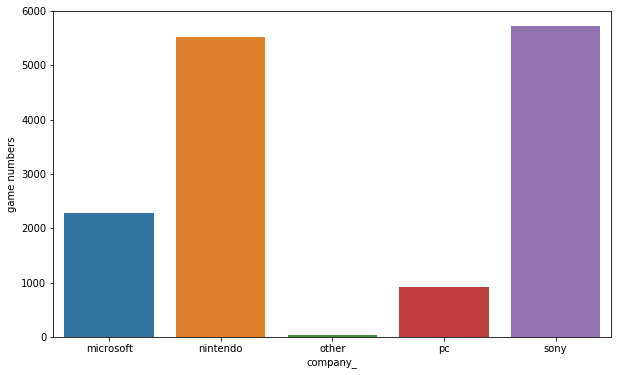

In [31]:
game_pt_company = game_sales_clean.pivot_table(
    index='company',
    values=['name','total_sales'],
    aggfunc=['count','sum']
).reset_index()

game_pt_company.columns = ["_".join((j,k)) for j,k in game_pt_company.columns]
plt.figure(figsize=(10, 6))
game_company_plot = sns.barplot(data=game_pt_company, x=game_pt_company.company_, y=game_pt_company.count_name)
game_company_plot.set_ylabel('game numbers')
plt.show()


There is a big difference between sony and nintendo to the rest of the companies in publishing games.
But it also means that each game requires more expenses for ICE to distribute.

How is game sales devided by number of games for each company compare?

In [32]:
game_pt_company['game_sale_by_num_games%'] =  game_pt_company.sum_total_sales /game_pt_company.count_name * 100
micfo_devided_nintendo = game_pt_company.query('company_ == "microsoft"')['sum_total_sales'].values / game_pt_company.query('company_ == "nintendo"')['sum_total_sales'].values

print('microsoft sales devided by nintendo',micfo_devided_nintendo[0])
game_pt_company

microsoft sales devided by nintendo 0.5257505220606549


,company_,count_name,count_total_sales,sum_total_sales,game_sale_by_num_games%
0,microsoft,2282,2282,1372.13,60.128396
1,nintendo,5515,5515,2609.85,47.322756
2,other,35,35,8.37,23.914286
3,pc,917,917,205.72,22.434024
4,sony,5721,5721,2963.08,51.793043


It seems altough microsoft has less than half the number of games, each game give between 13% to 38% more sales.
<br>But we can see the sales of nintendo and sony are much higher than microsoft.
<br>The sales created by nintendo is about 42% more, even more for Sony.

_______________________
Lets look for difference in game sales by platforms.<br>
We will use boxplot to clearly see the difference between 

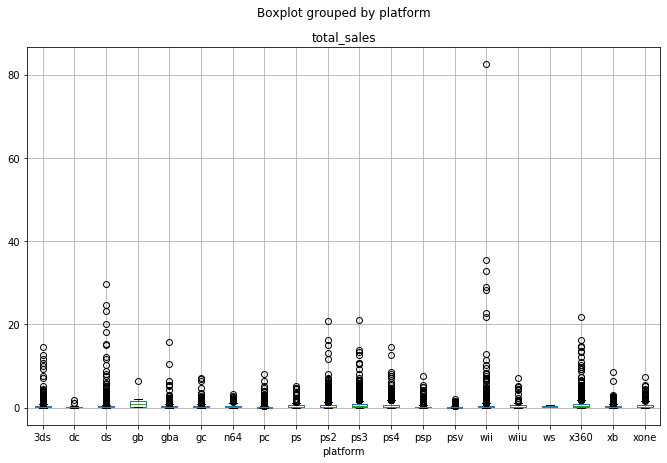

In [33]:
fig, ax = plt.subplots(figsize=(11,7))
game_sales_clean.boxplot(by='platform', column='total_sales', ax=ax);

Data is very dense and hard to understand

Even though It is clear that **Wii** has the largest destribution. and difference is significant.

Lets plot again after taking into account outliers

Lower bound: -0.5349999999999999
Upper bound: 1.025
-0.5349999999999999 1.025


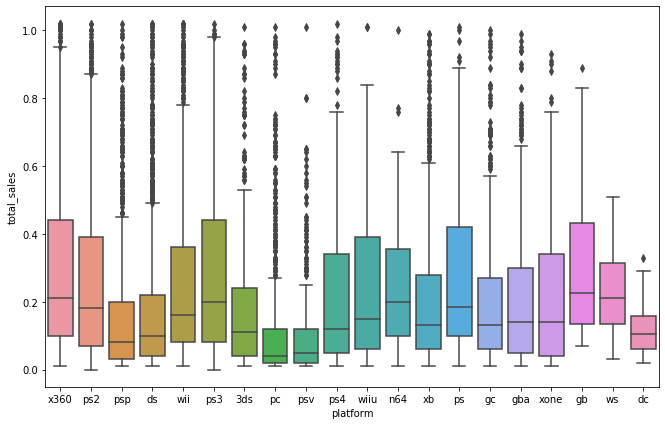

In [34]:
def calc_lower_upper_bounds(df, col_name):
    # calculate Q1 and Q3
    Q1 = df[col_name].quantile(.25)
    Q3 = df[col_name].quantile(.75)

    # calculate IQR
    IQR = Q3-Q1
    # calculate upper and lower bounds for outlier detection
    outlier_lower_bound = Q1 - 1.5*IQR
    outlier_upper_bound = Q3 + 1.5*IQR

    print('Lower bound:', outlier_lower_bound) # don't need this, no value is negative
    print('Upper bound:', outlier_upper_bound)
    return {'lower_bound':outlier_lower_bound, 'upper_bound':outlier_upper_bound}

lower_bound, upper_bound = calc_lower_upper_bounds(game_sales_clean, 'total_sales').values()
print(lower_bound, upper_bound)
filtered_game_sales = game_sales_clean.query('total_sales < @upper_bound & total_sales > @lower_bound')

fig, ax = plt.subplots(figsize=(11,7))
sns.boxplot(x="platform", y="total_sales", data=filtered_game_sales)

<div class="alert alert-success"> <b>Reviewer comment:</b> 
    
Great function for delete outliers from our data.

    
</div>

Data has less difference between platforms.

To be sure lets look at average sales.

total_sales
year_of_release platform             
2000            dc           0.299500
                gb           1.162353
                gba          0.070000
                n64          0.566167
                pc           0.665714
...                               ...
2016            psv          0.050000
                wii          0.180000
                wiiu         0.328571
                x360         0.116923
                xone         0.300575

[150 rows x 1 columns]

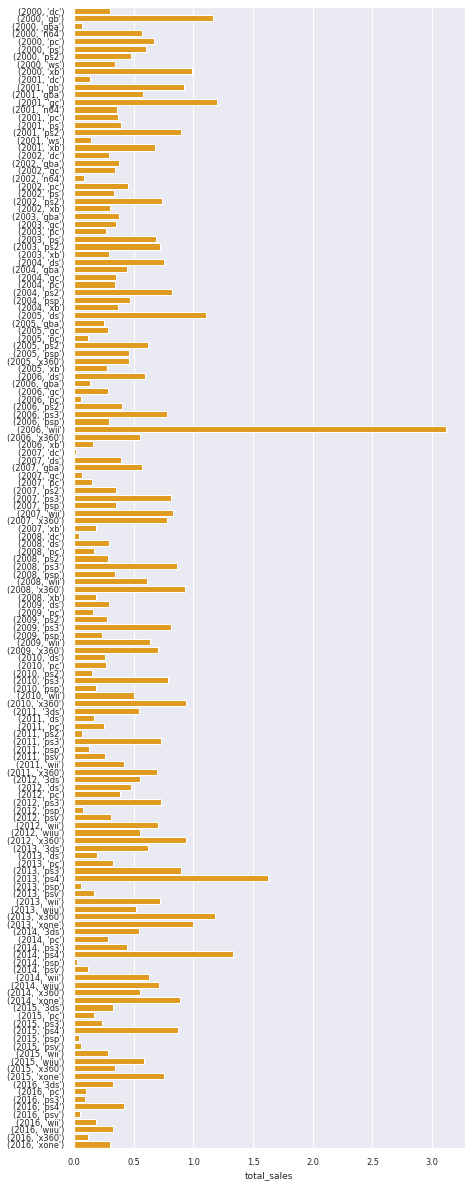

In [35]:
sns.set(font_scale = 0.75)
game_pt_platform = game_sales_clean.pivot_table(index=['year_of_release','platform'], values=['total_sales'])
fig, ax = plt.subplots(figsize=(7,21))
platform_plot_sns = sns.barplot(x = game_pt_platform.total_sales, y =game_pt_platform.index , color='orange')
platform_plot_sns.set_yticklabels(labels=game_pt_platform.index)

game_pt_platform

<div class="alert alert-danger"> <b>Reviewer comment:</b> 
    
<s>Something went wrong ☹️, please see what's the matter.
    
</div>

<div class="alert alert-info"> <b>I have no idea why it failed for you, but it works fine for me.</b> </div>

<div class="alert alert-success"> <b>Reviewer comment (2):</b> 
    

Okay, its maybe related with library versions.
    
</div>

Since life cycle of platforms is very short we should be looking for the last 2 years to identify strong platforms.

We can Identify that for 2015, 2016 **Xone**, **PS4**, **Wiiu** are the strongest platforms.
So game campaigns can target games from these platforms

------------------
**Next** we will take a look at how user and professional reviews affect sales for one popular platform, **xone**.

Lets build a scatter plot and calculate the correlation between reviews and sales.

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,total_sales
year_of_release,1.000000,-0.242667,-0.194925,-0.127050,-0.243414,0.063712,0.079481,-0.239183
na_sales,-0.242667,1.000000,0.765367,0.425725,0.988088,0.388636,-0.069318,0.970433
eu_sales,-0.194925,0.765367,1.000000,0.421071,0.852986,0.379162,-0.055911,0.898045
jp_sales,-0.127050,0.425725,0.421071,1.000000,0.441717,0.202954,0.069591,0.452701
other_sales,-0.243414,0.988088,0.852986,0.441717,1.000000,0.411825,-0.069645,0.995238
critic_score,0.063712,0.388636,0.379162,0.202954,0.411825,1.000000,0.472462,0.416998
user_score,0.079481,-0.069318,-0.055911,0.069591,-0.069645,0.472462,1.000000,-0.068925
total_sales,-0.239183,0.970433,0.898045,0.452701,0.995238,0.416998,-0.068925,1.000000


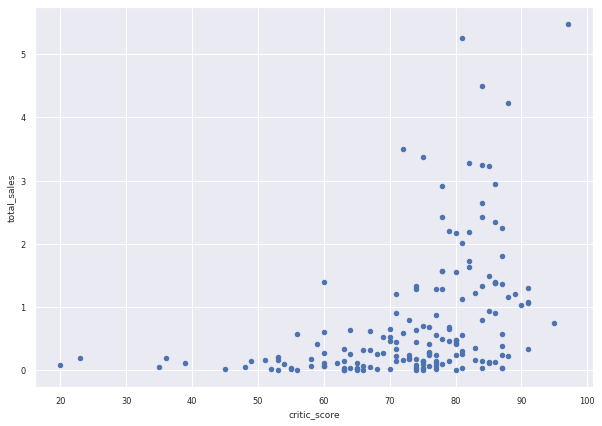

In [36]:
xone_critic_pt_sales = game_sales_clean.query('platform == "xone"')
fig, ax = plt.subplots(figsize=(10,7))
xone_critic_pt_sales.plot.scatter(x='critic_score',y='total_sales',ax=ax);
display(xone_critic_pt_sales.corr())
plt.show()

**critic_score** has a positive correlation of about 0.41. we also see a general trend that games with score of 60+
have increased total_sales

**Interestingly** user_score has a very slight negative correlation to total sales.

This suggest for xone platform we should target games with high critic reviews.

-------------
Lets do this on all the critic score and see what we get.

<div class="alert alert-success"> <b>Reviewer comment:</b> 
    

We can also use the `heatmap` method from the` seaborn` library to visualize the correlation matrix.
    
</div>

,critic_score,count_total_sales,mean_total_sales,median_total_sales
critic_score,1.000000,0.550144,0.586122,0.488890
count_total_sales,0.550144,1.000000,-0.155661,-0.197730
mean_total_sales,0.586122,-0.155661,1.000000,0.970337
median_total_sales,0.488890,-0.197730,0.970337,1.000000


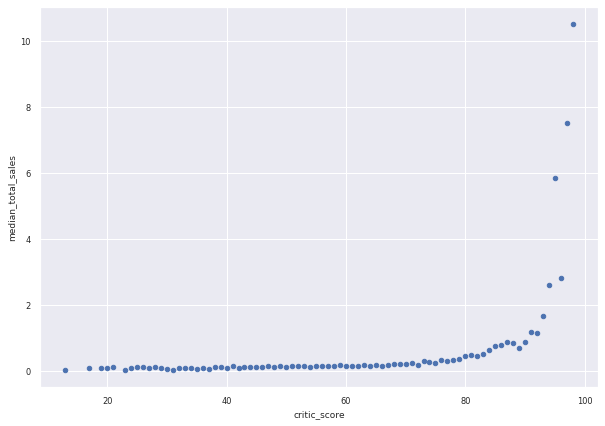

In [37]:
critic_pt_sales = game_sales_clean.pivot_table(index='critic_score', values=['total_sales'], aggfunc=['count','mean','median'])
critic_pt_sales.columns = ["_".join((j,k)) for j,k in critic_pt_sales.columns]
critic_pt_sales = critic_pt_sales.reset_index()
display(critic_pt_sales.corr())

fig, ax = plt.subplots(figsize=(10,7))
critic_pt_sales.plot.scatter(x='critic_score',y='median_total_sales',ax=ax);
plt.show()

It seems there is acorrelation between critic score and sales, of about 0.55.
<br>Interestingly enough the correlation is also strong with the number of reviews.

**The graph** shows that score of 80+ sales increase (seems exponentialy). 

-------------
As we continue understanding the data, we and finiding how to target in our campaign ads games.

We want to see how the same game comapres in different platforms.<br> 
Since we know we want platform in a 3 year range, I decided to use **xone, ps4 and wiiu**<br>
If we can't find games that are played on these 3 platforms we will find and choose others.
**Lets collect games and compare**

In [38]:
game_sales_clean_cp = game_sales_clean.copy()

def get_count(name):
    return dict_name_count[name]

# creating dictionary
game_sr_count = game_sales_clean['name'].value_counts()
dict_name_count = game_sr_count.to_dict()

game_sales_clean_cp['name_count'] = game_sales_clean_cp['name'].apply(get_count)
three_console = game_sales_clean_cp.query('name_count > 2')

# platforms become columns
name_col_platforms_pt = three_console.pivot_table(index='name', columns='platform', values='total_sales')
name_col_platforms_pt = name_col_platforms_pt[['xone','ps4','wiiu']]
name_col_platforms_pt = name_col_platforms_pt.dropna()

display(name_col_platforms_pt.head(), name_col_platforms_pt.describe())

platform,xone,ps4,wiiu
name,,,
adventure time: finn & jake investigations,0.05,0.10,0.05
angry birds star wars,0.17,0.22,0.10
assassin's creed iv: black flag,2.24,2.86,0.29
call of duty: ghosts,2.92,3.83,0.35
darksiders ii,0.07,0.23,0.15


platform,xone,ps4,wiiu
count,32.000000,32.000000,32.000000
mean,0.568438,0.910312,0.385000
std,0.750342,1.165907,0.269731
min,0.010000,0.030000,0.030000
25%,0.155000,0.227500,0.145000
50%,0.340000,0.580000,0.405000
75%,0.530000,0.870000,0.602500
max,2.920000,4.320000,1.010000


When Comparing same game between **ps4**, **xone** and **wiiu**, **ps4** has the best mean and median.

If we know of a game that is suppose to be come out on these platforms, **ps4** is a good campaign target.

---------------------
**Next** we will take a look at the general distribution of games by genre.

In [39]:
game_pt_genre = game_sales_clean[['genre', 'total_sales', 'na_sales','eu_sales','jp_sales']]

game_pt_genre.groupby('genre')['total_sales'].describe().sort_values(by='mean', ascending=False)

,count,mean,std,min,25%,50%,75%,max
genre,,,,,,,,
shooter,1129.0,0.808415,1.739590,0.01,0.08,0.24,0.7500,14.73
platform,720.0,0.686694,1.906850,0.01,0.09,0.21,0.6000,29.80
sports,1979.0,0.571460,2.251241,0.00,0.09,0.21,0.5400,82.54
role-playing,1300.0,0.562477,1.384526,0.01,0.06,0.16,0.4700,18.24
racing,1035.0,0.542087,1.685550,0.00,0.06,0.17,0.4800,35.52
action,3079.0,0.495667,1.138546,0.01,0.06,0.18,0.4700,21.05
fighting,640.0,0.487344,0.908183,0.01,0.07,0.19,0.5125,12.84
misc,1597.0,0.449812,1.340550,0.01,0.06,0.15,0.3900,28.91
simulation,768.0,0.436732,1.234992,0.01,0.05,0.14,0.4000,24.67


We can see the top 5 genres with the most sales:
* **shooter**
* **platform**
* **sport**
* **role-playing**
* **racing**

We also see in the max column a very big spike in sports, lets remove outliers and boxplot.


<div class="alert alert-success"> <b>Reviewer comment (2):</b> 
    

It's a great approach to draw conclusions based on averages. This indicator is more stable in relation to the amount or quantity.
    
</div>

Lower bound: -0.5349999999999999
Upper bound: 1.025
-0.5349999999999999 1.025


,count,mean,std,min,25%,50%,75%,max
genre,,,,,,,,
sports,1741.0,0.258076,0.241299,0.00,0.08,0.17,0.37,1.02
shooter,912.0,0.256371,0.254245,0.01,0.06,0.15,0.41,1.02
platform,603.0,0.244975,0.233455,0.01,0.07,0.15,0.36,1.02
fighting,559.0,0.242451,0.237394,0.01,0.07,0.14,0.35,1.01
action,2725.0,0.228532,0.231279,0.01,0.05,0.14,0.33,1.02
racing,906.0,0.225243,0.233787,0.00,0.05,0.13,0.31,1.02
role-playing,1142.0,0.216068,0.226076,0.01,0.05,0.13,0.29,1.02
misc,1463.0,0.211032,0.217940,0.01,0.05,0.13,0.29,1.02
simulation,697.0,0.207834,0.222953,0.01,0.04,0.12,0.30,1.02


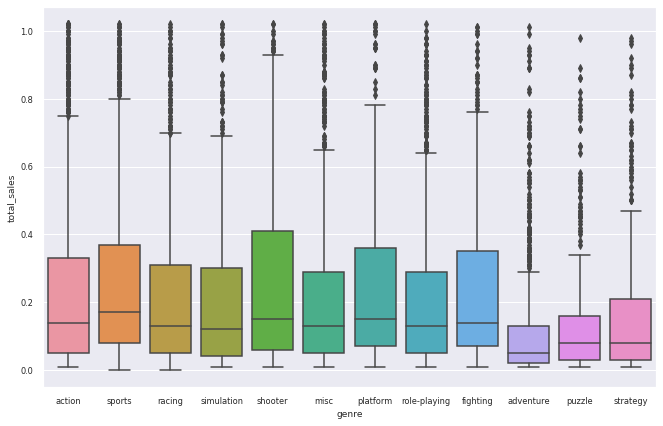

In [40]:
lower_bound, upper_bound = calc_lower_upper_bounds(game_sales_clean, 'total_sales').values()
print(lower_bound, upper_bound)
filtered_game_sales = game_sales_clean.query('total_sales < @upper_bound & total_sales > @lower_bound')

display(filtered_game_sales.groupby('genre')['total_sales'].describe().sort_values(by='mean', ascending=False))

fig, ax = plt.subplots(figsize=(11,7))
sns.boxplot(x="genre", y="total_sales", data=filtered_game_sales)

After removing outliers, sports became number 1 in sales.

There are some changes between top 5 genres but we can safely determine the top 3:

* **shooter**
* **platform**
* **sports**

We can see from the boxplot that genres like: **adventure**, **puzzle**, **strategy** are quite low on sales and have a large destribution.

Meaning they are more risky in predicting sales.

---------------------
We will continue exploring genres in the next section, where we understand better the differences between regions.

<div class="alert alert-success"> <b>Reviewer comment:</b> 
    

Great 👍
    
</div>

<a class='anchor' id='Create_a_user_profile_for_each_region'></a>
[Go back to the Table of Contents](#table_of_contents)

## [Create a user profile for each region](#Create_a_user_profile_for_each_region)

For each region (NA, EU, JP), determine:
* The top five platforms. Describe variations in their market shares from region to region.
* The top five genres. Explain the difference.
* Do ESRB ratings affect sales in individual regions?

na_sales 2013 - 2016


,na_sales
platform,
x360,0.439032
xone,0.377004
wii,0.285217
ps4,0.277398
wiiu,0.254000


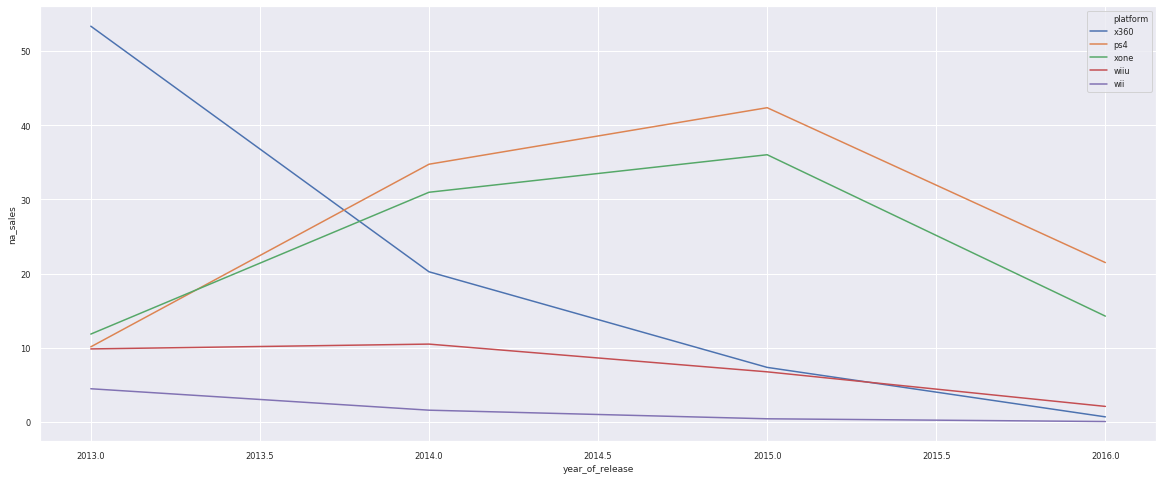

-----------------------
eu_sales 2013 - 2016


,eu_sales
platform,
ps4,0.359923
wii,0.257826
x360,0.228602
xone,0.208866
ps3,0.196551


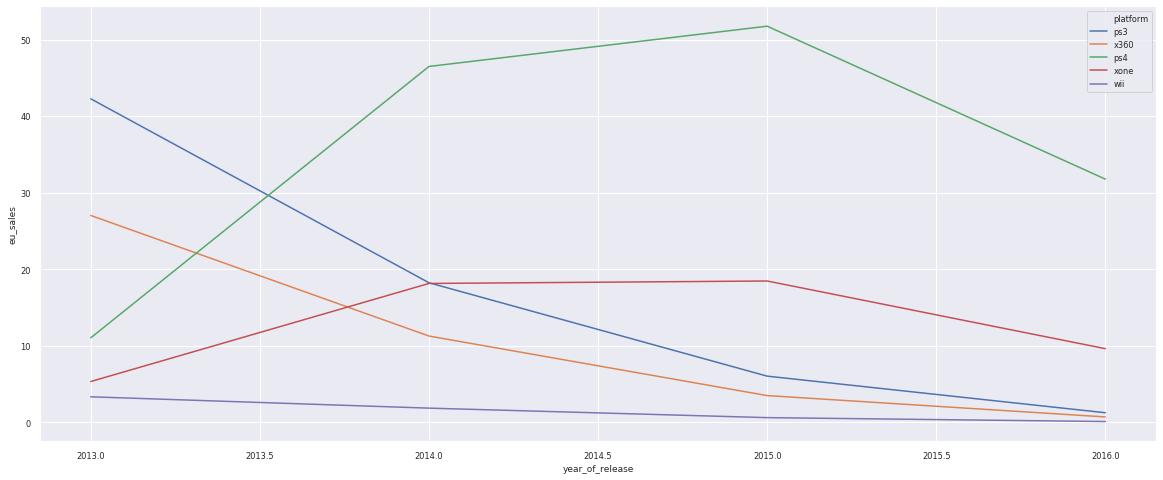

-----------------------
jp_sales 2013 - 2016


,jp_sales
platform,
3ds,0.223795
wiiu,0.094609
ps3,0.067681
psv,0.051927
psp,0.049104


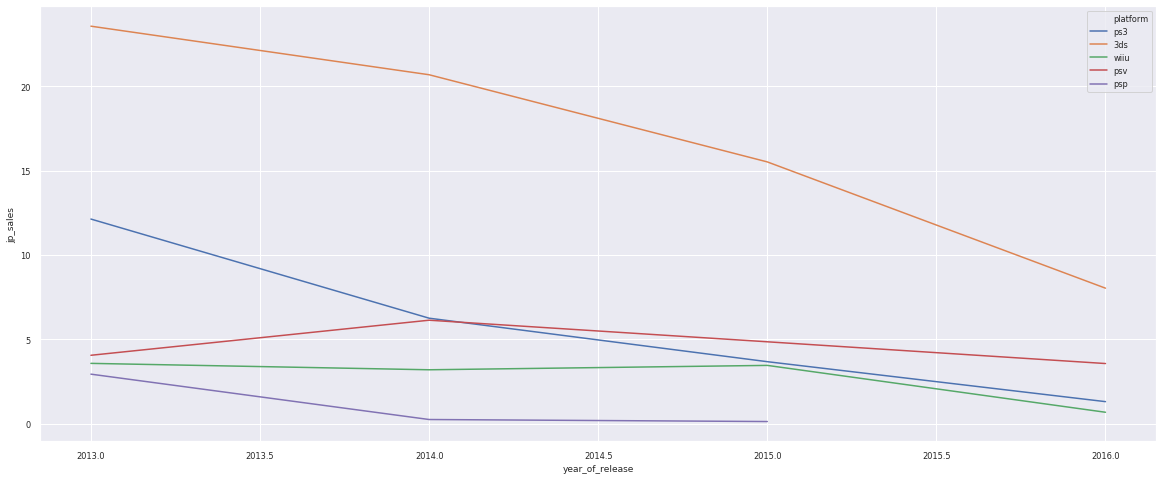

-----------------------
other_sales 2013 - 2016


,other_sales
platform,
ps4,0.123342
ps3,0.077594
x360,0.065108
xone,0.057773
wii,0.048696


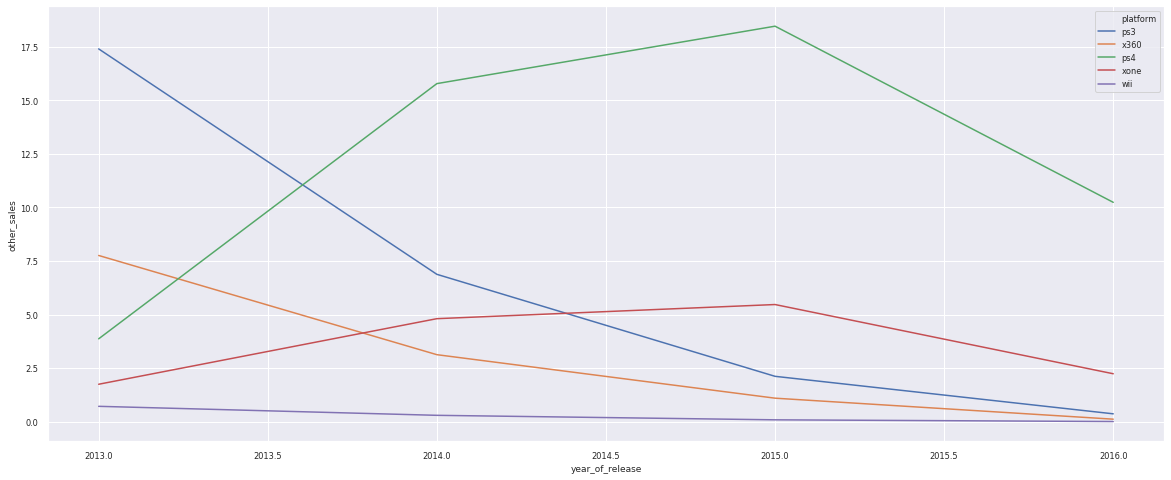

-----------------------


In [41]:
def iter_regions_for_col(df, column):
    for region in ['na_sales','eu_sales','jp_sales','other_sales']:        
        print(region, '2013 - 2016')
        # filtering
        year_filtered = df.query('year_of_release > 2012')
        region_df = year_filtered.pivot_table(index=[column],values=[region]).sort_values(by=region, ascending=False).reset_index().head()
        display(region_df.pivot_table(index=[column],values=[region]).sort_values(by=region, ascending=False).head())
        top_by_column = df[df[column].isin(region_df[column].values)]

#       plotting
        top_by_column_rev_years = top_by_column.query('year_of_release > 2012')
        plt.figure(figsize=(20, 8))
        sns.lineplot(data=top_by_column_rev_years , x='year_of_release', y=region, hue=column, estimator='sum', markers=False, ci = None)
        plt.show()
        print('-----------------------')   
iter_regions_for_col(game_sales_clean, 'platform')

Summay of platfrom in each region in the last 3 years:
* Na: It seems microsoft with xbox brand is leading in sales

* Eu: Sony and nintendo are the top 2 xbox brand takes spots 3 and 4

* Jp: no xbox what's so ever, maybe a bit of country loyaltey since sony and nintendo are from Japan.

* Other: sony and nintendo in the top while xbox takes 3 and 4

In general 3 of the top sales are sony and nintendo

-----------
Next we will explore the differences between regions regarding genres.

na_sales 2013 - 2016


,na_sales
genre,
shooter,0.586845
sports,0.305000
platform,0.245135
fighting,0.194375
misc,0.177355


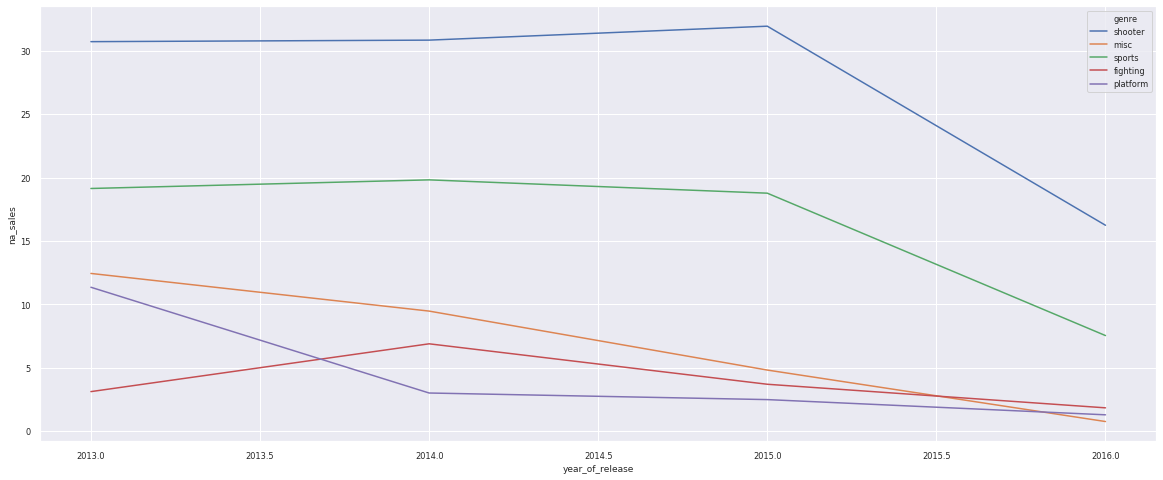

-----------------------
eu_sales 2013 - 2016


,eu_sales
genre,
shooter,0.469840
sports,0.282804
racing,0.237529
platform,0.210541
simulation,0.176129


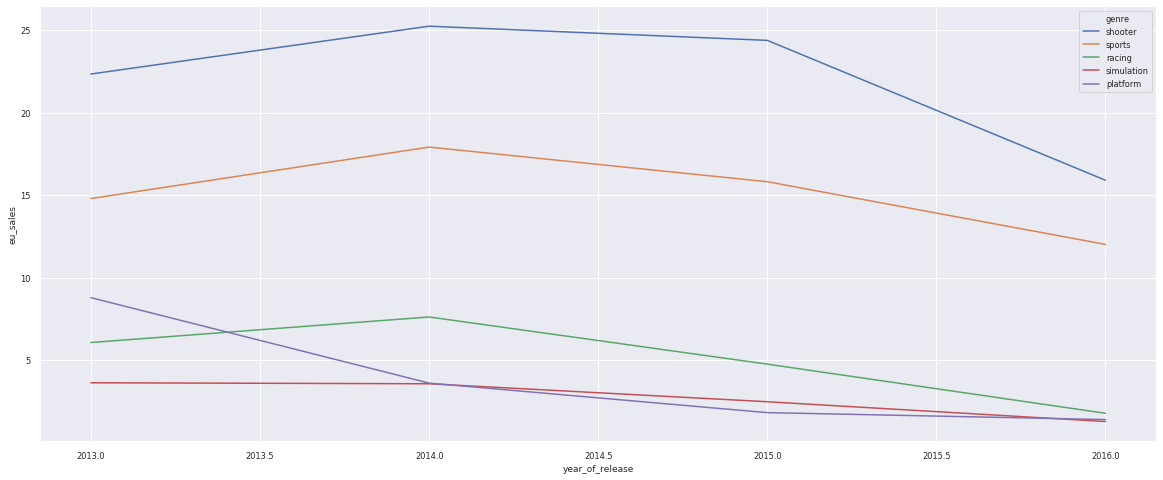

-----------------------
jp_sales 2013 - 2016


,jp_sales
genre,
role-playing,0.174795
fighting,0.095625
simulation,0.072903
puzzle,0.069412
platform,0.064730


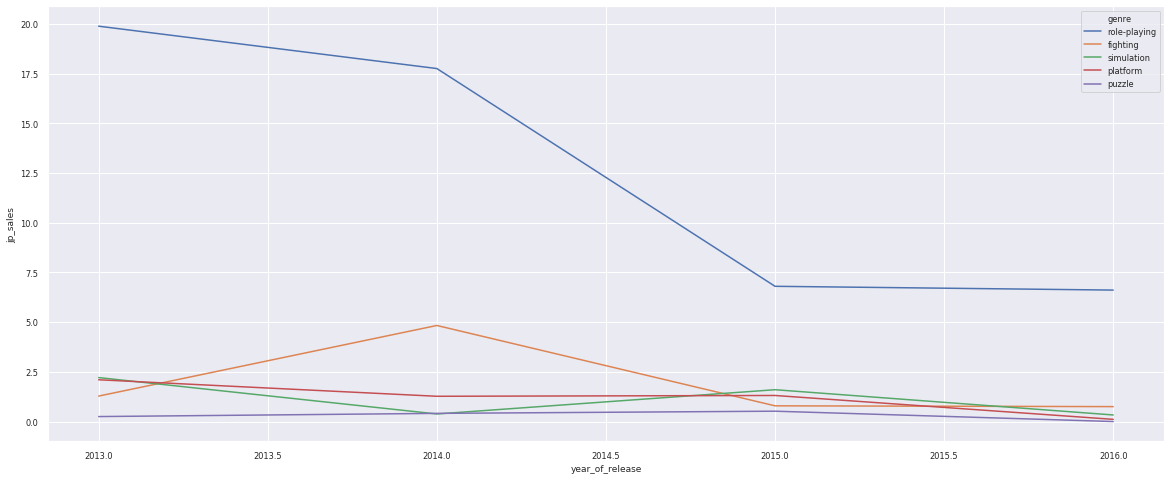

-----------------------
other_sales 2013 - 2016


,other_sales
genre,
shooter,0.153850
sports,0.090888
platform,0.055676
racing,0.052235
action,0.048564


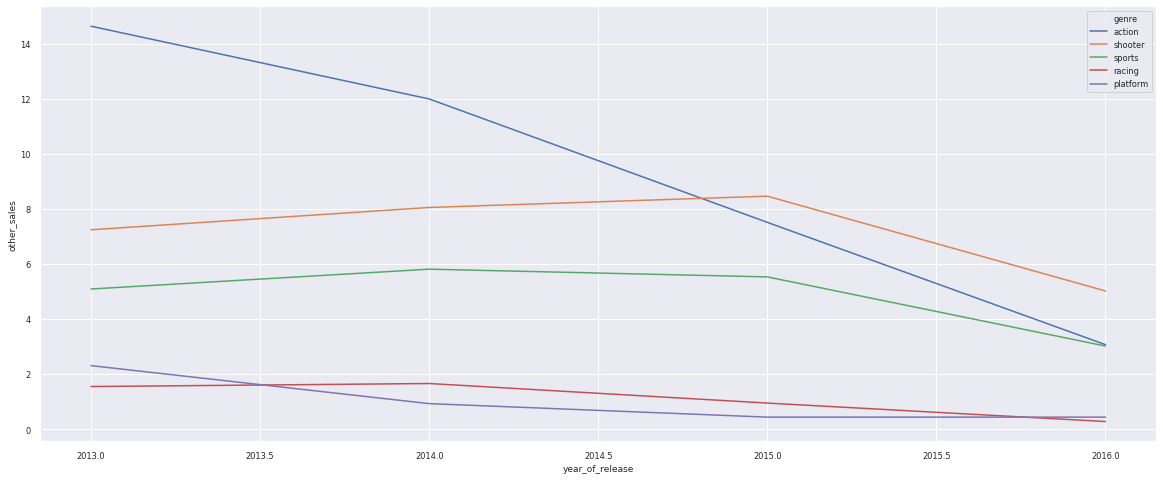

-----------------------


In [42]:
iter_regions_for_col(game_sales_clean, 'genre')

We can see in the last 3 years there is a decline in all genres.<br>
In through it all shooter have a big margin of sales compared to the rest of the genres.<br>
Except Jp, where role playing is the strong genre.

Reasons for the differences:
* Na and Eu had a stronger pc culture compared to Jp, shooting games in pc are more common(from personal knowledge).

----------
**Next** we will explore rating and how it affect game sales in different regions.

Some context, what do the rating mean, from wikipedia:
* RP:   games which have not yet been assigned a final rating.
* e:    generally suitable for all ages.
* e10+: generally suitable for those aged 10 years and older.
* t:    generally suitable for those aged 13 years and older.
* m:    generally suitable for those aged 17 years and older.
* ao:   generally suitable for those aged 18 years and older.

na_sales 2013 - 2016


,na_sales
rating,
m,0.447724
e,0.261755
e10+,0.215238
t,0.149520


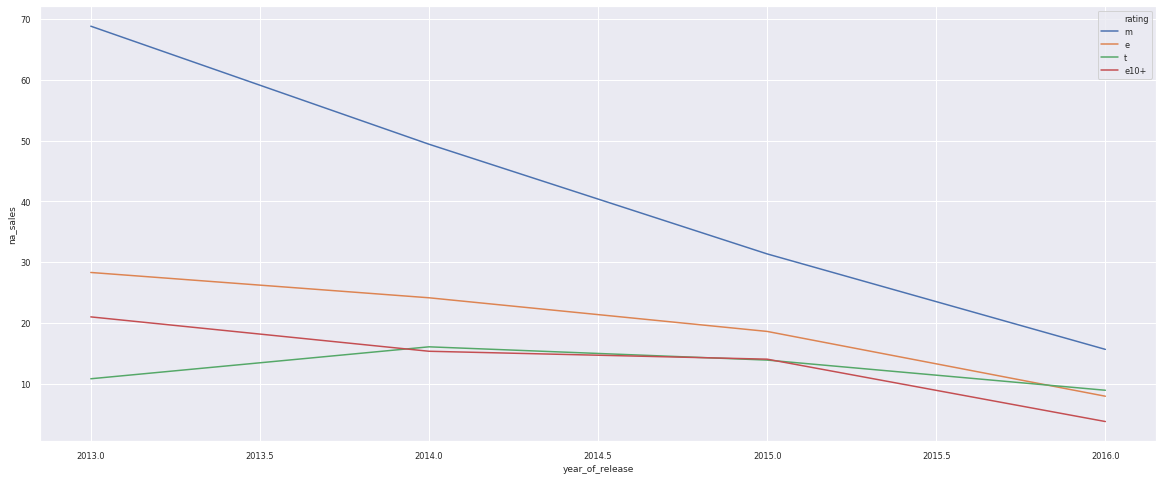

-----------------------
eu_sales 2013 - 2016


,eu_sales
rating,
m,0.393821
e,0.276026
e10+,0.169405
t,0.125976


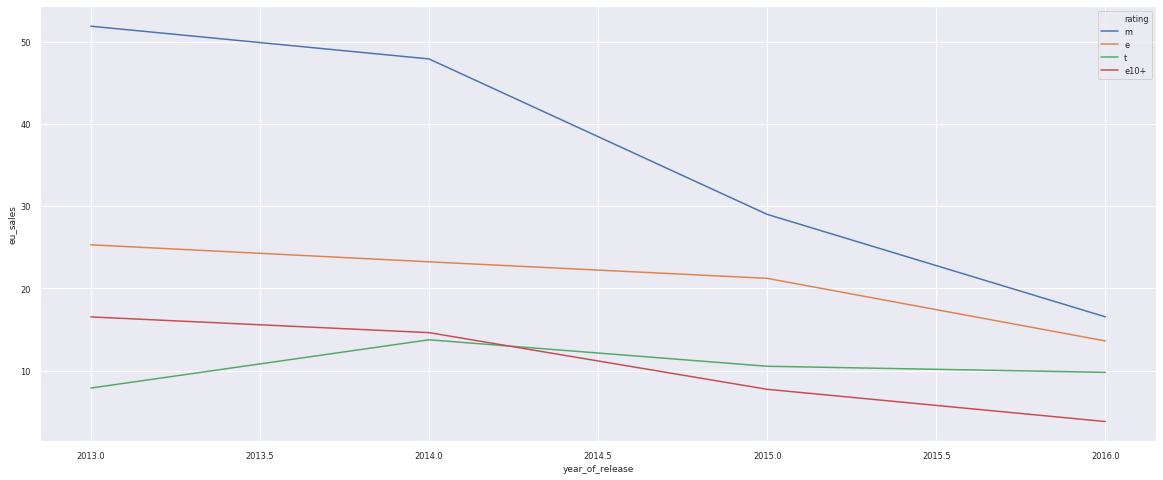

-----------------------
jp_sales 2013 - 2016


,jp_sales
rating,
t,0.061832
e,0.050132
m,0.038238
e10+,0.023373


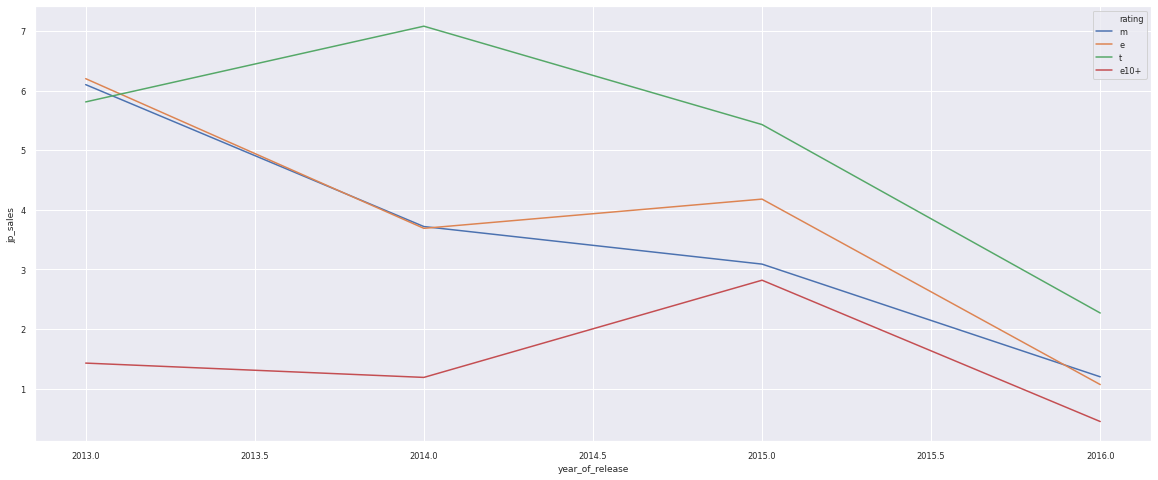

-----------------------
other_sales 2013 - 2016


,other_sales
rating,
m,0.127480
e,0.074868
e10+,0.049881
t,0.042913


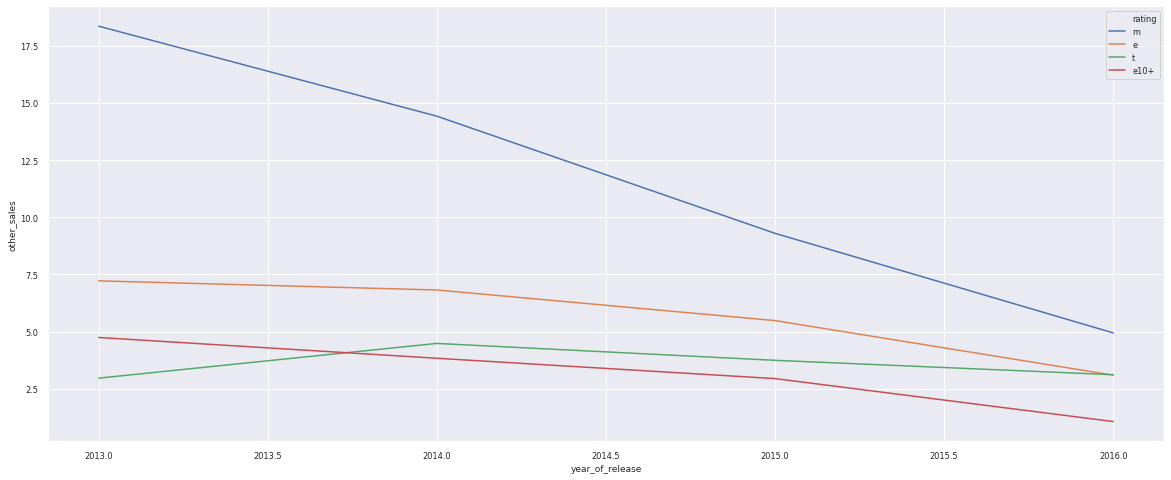

-----------------------


In [43]:
iter_regions_for_col(game_sales_clean, 'rating')

Summary for data:
* na: m and e are the top 2 by a large margin.
* eu: m and e are the top 2 by a large margin.
* jp: t and e are the top 2 by large margin.
* other: m and e are the top 2 by a large margin.

Possilbe reasons:   <br>
* The audiance for e are children, parents buy for their child
* games for 17+ target audiance are the people who buy for them self, they usally buy for them self so they are more willing to spend more money    

**We can conclude that any game ad campgain should target games with m or e rating.**

<div class="alert alert-success"> <b>Reviewer comment:</b> 
    

We analyzed our data in detail and studied the portraits of users.
    

    
Let's now test our hypotheses.
    
</div>


<a class='anchor' id='Test_the_following_hypotheses'></a>
[Go back to the Table of Contents](#table_of_contents)

## [Test the following hypotheses:](#Test_the_following_hypotheses:)
* Average user ratings of the Xbox One and PC platforms are the same.
* Average user ratings for the Action and Sports genres are different.

Set the alpha threshold value yourself.
Explain:
* How you formulated the null and alternative hypotheses
* What significance level you chose to test the hypotheses, and why

Lets test user rating with platform hypothesis:

- The average user ratings of the xone and pc platforms are the same
 null hypothesis and the alternative hepothesis as follow:
- $H_0$ : $\mu$(`user_score` of XOne) = $\mu$(`user_score` of PC)  
- $H_a$ : $\mu$(`user_score` of XOne) != $\mu$(`user_score` of PC)  


<div class="alert alert-success"> <b>Reviewer comment:</b> 
    
Hypotheses formulated correctly. 
    
**Best practies:**
    
Before testing the hypothesis, I recommend checking the variances of the samples in order to correctly determine the `equal_val` attribute in the T-test.
    
This includes visualizing the distribution of each sample.
    
</div>

In [44]:
from scipy import stats as st

alpha = 0.05

avg_user_for_xone_sr = game_sales_clean.query('platform == "xone"')['user_score']
avg_user_for_pc_sr = game_sales_clean.query('platform == "pc"')['user_score']

avg_user_for_pc_sr_clean = avg_user_for_pc_sr.dropna()
avg_user_for_xone_sr_clean = avg_user_for_xone_sr.dropna()
results = st.ttest_ind(avg_user_for_xone_sr_clean ,avg_user_for_pc_sr_clean, equal_var=False)

print('p-value: ', results.pvalue)

if results.pvalue < alpha:
    print("We reject the null hypothesis")
else:
    print("We can't reject the null hypothesis") 

p-value:  1.5670097178375394e-05
We reject the null hypothesis


<div class="alert alert-warning"> <b>Reviewer comment:</b> 
    
It is best to import all the required libraries at the very beginning of the project.
    
This is a generally accepted format in programming, because it makes it easier to understand which packages will be used in our work.
    
</div>

Lets test average user rating for action and sport:

The average user ratings of the action and sports genre are the same
- $H_0$ : $\mu$(`user_score` of action) = $\mu$(`user_score` of sports)  
- $H_a$ : $\mu$(`user_score` of action) != $\mu$(`user_score` of sports)  

<div class="alert alert-success"> <b>Reviewer comment:</b> 
    
Hypotheses formulated correctly. 
    
    
</div>

In [45]:
alpha = 0.05

avg_user_for_action_sr = game_sales_clean.query('genre == "action"')['user_score']
avg_user_for_sports_sr = game_sales_clean.query('genre == "sports"')['user_score']

avg_user_for_action_sr_clean = avg_user_for_action_sr.dropna()
avg_user_for_sports_sr_clean = avg_user_for_sports_sr.dropna()
results = st.ttest_ind(avg_user_for_action_sr_clean ,avg_user_for_sports_sr_clean, equal_var=False)

print('p-value: ', results.pvalue)

if results.pvalue < alpha:
    print("We reject the null hypothesis")
else:
    print("We can't reject the null hypothesis") 

p-value:  0.10115120156606783
We can't reject the null hypothesis


The after testing the hypothesis we can conclude with high certainty:

* The avg user score of xone is not the same as the avg user score of pc.
* We can't reject the the avg user score of action genre is the equal to the avg user score of sports genre.

<div class="alert alert-success"> <b>Reviewer comment:</b> 
    
Please note that our actions are also repeated in terms of calculating statistical tests, this suggests that we can also create a function here 😊
    
</div>

<a class='anchor' id='General_Conclusion'></a>
[Go back to the Table of Contents](#table_of_contents)

## [General Conclusion:](#General_Conclusion:)

After identifying issues in the data itself we proceeded to cleaning and preaparing the data for analysis.

While analyzing we idntified the period of time to make the analysis more relevant:
about 13.4 % of the data was before 2000, very old platforms.
So we decided to filter these years.

We also categorized the data to better understand the different platforms.
what we learned:<br>
Nintendo and Sony are proliphic platform creaters,  twice as many games were released for theses companies platforms compared to Microsoft.

But even though Microsoft has half as many games as Nintendo or Sony, the sales for it's platfrom give 13% more sales.

What we come to are the platforms themselfs
What we learned is that platform have a very short life span.
about 3 years.

Any ad campgain will have to target games from recent platfroms.<br>
We can Identify that for 2015, 2016 Xone, PS4, Wiiu are the strongest platforms
<br> It's important to note PS4 is has the heighst sales and games for it should be considered more highly.
Now that we have the platforms, next is how do we select games?

From our investigation we learn that games with high critic score yeid high sales.
the higher critic score the more sales, another parameter is number of reviews that indicate positive correlation.
<br> sales increase almost exponentialy as critic score go up.umber of reviews.

Another paramter that we should look is genere.
best genre to concetrate:
We determined the top 3 genres:
1. shooter
2. platform
3. sports

One thing to note some genres have a stronger sales in specific region.
<br> I would suggest for role playing and platform genre games we should target JP, and for the rest shooter.

The last parameter is in relation to rating:


rating and region sales:
* The audiance for e are children, parents buy for their child
* games for 17+ target audiance are the people who buy for them self, they usally buy for them self so they are more willing to spend more money    
We can conclude that any game ad campgain should target games with m or e rating.
* na: m and e are the top 2 by a large margin.
* eu: m and e are the top 2 by a large margin.
* jp: t and e are the top 2 by large margin.

In summary:
Next year concentrate on games on these platforms:
Xone, PS4, Wiiu

Look for games with high critic score and look for games from these genres:
* shooter
* platform
* sports

For JP concentrate on games only from PS4 and Wiiu, xone isn't in the top sales there.
<br> Target games with e or t rating and high critic score. with emphasis of platform games and role playing.

For the rest target games with e and m rating and high critic score with emphasis on shooter

<div class="alert alert-success"> <b>Reviewer comment:</b> 

The conclusions are clear and logical, and most importantly, they are supported by the revealed facts.
       
In general, the project itself is at a good level! Throughout the entire work, the depth of the task development is felt and this is an absolute plus for us. A large number of methods have been used that will help you in your future projects.
    
    
Congratulations on the successful completion of the project 😊👍
    
And I wish you success in your new work 😊
    
**[general comment]** Cells **markdown** including we can use as an additional way to style our project. I left a link below, with examples of styling.

https://sqlbak.com/blog/jupyter-notebook-markdown-cheatsheet
    
</div>
